# Lending Case Study

In [204]:
## Importing all necessary libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 99999)

In [205]:
df = pd.read_csv('loan.csv')

/var/folders/4j/p55p4sc934573y6plnndpx200000gn/T/ipykernel_1291/129683778.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


In [206]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [207]:
print("Shape: ", df.shape)
df.columns[df.isna().sum() > 0]

Shape:  (39717, 111)


Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', '

In [208]:
## Dropping all columns that contain NULL values

df.dropna(axis=1, how='all', inplace=True)
print('Shape: ', df.shape)
df.columns[df.isna().sum() > 0]

Shape:  (39717, 57)


Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [209]:
print(df.isna().sum()/len(df.columns))

## Columns containing 0 null values
print(df.columns[df.isna().sum() > 0])

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                      43.140351
emp_length                     18.859649
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
url                             0.000000
desc                          227.052632
purpose                         0.000000
title                           0.192982
zip_code                        0.000000
addr_state                      0.000000
dti             

There are 14 more columns that still contains missing values.

Filling in the missing values in the columns with the mode/mean/median of the columns can be done.
Since there are 14 columns, 
Lets identify which of the columns would be needed for the analysis and which of the columns would not be needed for the analysis.

In [210]:
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

columns with all unique values can be dropped as they do not provide any information

In [211]:
## Identifying columns with all unique values
print("Shape: ",df.shape)
# print(df.nunique())
df_unique = (df.nunique() == 1) 
df_unique = df_unique[df_unique == True]
print(df_unique)


## Dropping columns that contain only 1 unique value
df.drop(df_unique.index, axis=1, inplace=True)
df.shape

Shape:  (39717, 57)
pymnt_plan                    True
initial_list_status           True
collections_12_mths_ex_med    True
policy_code                   True
application_type              True
acc_now_delinq                True
chargeoff_within_12_mths      True
delinq_amnt                   True
tax_liens                     True
dtype: bool


(39717, 48)

In [212]:
def print_unique_and_null_values(df_x):
    print(df_x.shape)
    # for col in df.columns:
    #     print(col, df[col].nunique(), df[col].isna().sum())
    na_sum = df_x.isna().sum()
    n_unique = df_x.nunique()
    na_percentage = ((na_sum/len(df_x)) * 100).astype(int).apply(str) + '%'

    na_sum_df = na_sum.reset_index()
    n_unique_df = n_unique.reset_index()
    na_percentage_df = na_percentage.reset_index()

    n_unique_df.columns = ['Column', 'Unique Values']
    na_sum_df.columns = ['Column', 'Missing Values']
    na_percentage_df.columns = ['Column', 'Missing Percentage']

    merged_df = pd.merge( n_unique_df,na_sum_df, on='Column')
    merged_df = pd.merge(merged_df, na_percentage_df, on='Column')
    print(merged_df)

In [213]:
print("Shape: \n", df.shape)
print_unique_and_null_values(df)

Shape: 
 (39717, 48)
(39717, 48)
                     Column  Unique Values  Missing Values Missing Percentage
0                        id          39717               0                 0%
1                 member_id          39717               0                 0%
2                 loan_amnt            885               0                 0%
3               funded_amnt           1041               0                 0%
4           funded_amnt_inv           8205               0                 0%
5                      term              2               0                 0%
6                  int_rate            371               0                 0%
7               installment          15383               0                 0%
8                     grade              7               0                 0%
9                 sub_grade             35               0                 0%
10                emp_title          28820            2459                 6%
11               emp_length    

Columns that are not required for analysis
(based on the value present in the cells and data dictionary)

In [214]:
def remove_columns(df, columns_to_remove):
    df_x = df.copy()
    df_x.drop(columns_to_remove, axis=1, inplace=True)
    return df_x


# Columns that are not required for analysis based on the present value and data dictionary
irrelevant_columns = np.array([
    # 'id',
    'member_id',
    'url',
    'desc',
    'title',
    'zip_code',
    # 'addr_state',
])

print("irrelevant_columns.shape: ", irrelevant_columns.shape)

df_1 = remove_columns(df, irrelevant_columns)

print("Shape: \n", df_1.shape)
print_unique_and_null_values(df_1)

irrelevant_columns.shape:  (5,)
Shape: 
 (39717, 43)
(39717, 43)
                     Column  Unique Values  Missing Values Missing Percentage
0                        id          39717               0                 0%
1                 loan_amnt            885               0                 0%
2               funded_amnt           1041               0                 0%
3           funded_amnt_inv           8205               0                 0%
4                      term              2               0                 0%
5                  int_rate            371               0                 0%
6               installment          15383               0                 0%
7                     grade              7               0                 0%
8                 sub_grade             35               0                 0%
9                 emp_title          28820            2459                 6%
10               emp_length             11            1075                 2%

In [215]:
# Columns that are post-loan approval and not required for analysis
post_approval_columns = np.array([
    'emp_title', 

    'funded_amnt',

    'issue_d', 
    'delinq_2yrs', 
    
    'mths_since_last_delinq',
    'mths_since_last_record',

    'revol_bal',

    "out_prncp",
    "out_prncp_inv",

    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',

    'recoveries',
    'collection_recovery_fee', 

    'last_pymnt_d',
    'last_pymnt_amnt', 
    'next_pymnt_d', 
    'last_credit_pull_d'
    # 'pub_rec_bankruptcies'
    ])

print("post_approval_columns.shape: ",post_approval_columns.shape)

df_1 = remove_columns(df_1, post_approval_columns)

print("Shape: \n", df_1.shape)
print_unique_and_null_values(df_1)


post_approval_columns.shape:  (20,)
Shape: 
 (39717, 23)
(39717, 23)
                  Column  Unique Values  Missing Values Missing Percentage
0                     id          39717               0                 0%
1              loan_amnt            885               0                 0%
2        funded_amnt_inv           8205               0                 0%
3                   term              2               0                 0%
4               int_rate            371               0                 0%
5            installment          15383               0                 0%
6                  grade              7               0                 0%
7              sub_grade             35               0                 0%
8             emp_length             11            1075                 2%
9         home_ownership              5               0                 0%
10            annual_inc           5318               0                 0%
11   verification_status       

<Axes: >

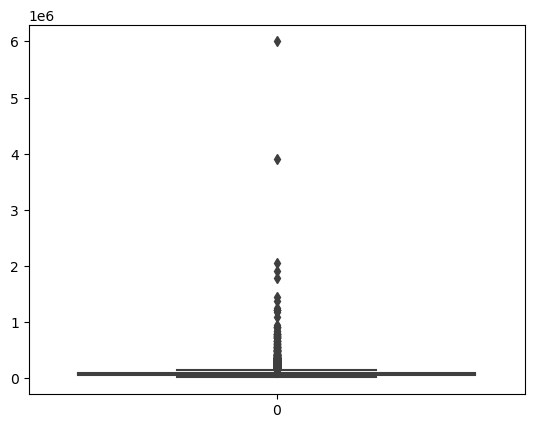

In [216]:
# removing outliers from annual_income
sns.boxplot(df_1['annual_inc'])

In [217]:
quantile_info = df_1.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99,1.0])
quantile_info

0.50      59000.00
0.75      82300.00
0.90     116000.00
0.95     142000.00
0.97     165757.92
0.98     187000.00
0.99     234999.36
1.00    6000000.00
Name: annual_inc, dtype: float64

In [218]:
per_95_annual_inc = df_1['annual_inc'].quantile(0.99)
df_1 = df_1[df_1.annual_inc <= per_95_annual_inc]

# Data Standardization

In [219]:
## emp_length column

emp_length_default = df_1['emp_length'].mode()[0]

df_1['emp_length'].value_counts()
df_1['emp_length'].fillna(emp_length_default, inplace=True)

print_unique_and_null_values(df_1)

(39319, 23)
                  Column  Unique Values  Missing Values Missing Percentage
0                     id          39319               0                 0%
1              loan_amnt            881               0                 0%
2        funded_amnt_inv           8109               0                 0%
3                   term              2               0                 0%
4               int_rate            371               0                 0%
5            installment          15289               0                 0%
6                  grade              7               0                 0%
7              sub_grade             35               0                 0%
8             emp_length             11               0                 0%
9         home_ownership              5               0                 0%
10            annual_inc           5161               0                 0%
11   verification_status              3               0                 0%
12           

In [220]:
## revol_util column
df_1['revol_util'].isna().sum()

## since the number of missing values is very low, we can drop the rows with missing values
df_1.dropna(axis=0, subset=['revol_util'], inplace=True)

print_unique_and_null_values(df_1)

(39270, 23)
                  Column  Unique Values  Missing Values Missing Percentage
0                     id          39270               0                 0%
1              loan_amnt            880               0                 0%
2        funded_amnt_inv           8099               0                 0%
3                   term              2               0                 0%
4               int_rate            371               0                 0%
5            installment          15270               0                 0%
6                  grade              7               0                 0%
7              sub_grade             35               0                 0%
8             emp_length             11               0                 0%
9         home_ownership              5               0                 0%
10            annual_inc           5157               0                 0%
11   verification_status              3               0                 0%
12           

In [221]:
## pub_rec_bankruptcies column

df_1['pub_rec_bankruptcies'].value_counts()

## records with loan_status == 'Current', should not be considered for analysis, since the loan_status is not final
df_1= df_1[ df_1['loan_status'] != 'Current' ]


## records with loan_status == 'Fully Paid', probabily have pub_rec_bankruptcies == 0
# df_1['pub_rec_bankruptcies'] = np.where(df_1['loan_status'] == 'Fully Paid', 0, df_1['pub_rec_bankruptcies'])

print_unique_and_null_values(df_1)

(38144, 23)
                  Column  Unique Values  Missing Values Missing Percentage
0                     id          38144               0                 0%
1              loan_amnt            866               0                 0%
2        funded_amnt_inv           7946               0                 0%
3                   term              2               0                 0%
4               int_rate            370               0                 0%
5            installment          14909               0                 0%
6                  grade              7               0                 0%
7              sub_grade             35               0                 0%
8             emp_length             11               0                 0%
9         home_ownership              5               0                 0%
10            annual_inc           5060               0                 0%
11   verification_status              3               0                 0%
12           

In [222]:
## pub_rec_bankruptcies column
df_1_pub_rec_bankruptcies_na = df_1[ df_1['pub_rec_bankruptcies'].isna()]

count = df_1['loan_status'].value_counts()
na_len =  df_1_pub_rec_bankruptcies_na['loan_status'].value_counts()

print(count)
print(na_len)
print('\n',(na_len/count)*100)

loan_status
Fully Paid     32576
Charged Off     5568
Name: count, dtype: int64
loan_status
Fully Paid     572
Charged Off    116
Name: count, dtype: int64

 loan_status
Fully Paid     1.755894
Charged Off    2.083333
Name: count, dtype: float64


In [223]:
## since the ratio of missing values is very low, we can drop the rows with missing values
df_1.dropna(axis=0, subset=['pub_rec_bankruptcies'], inplace=True)

print_unique_and_null_values(df_1)

(37456, 23)
                  Column  Unique Values  Missing Values Missing Percentage
0                     id          37456               0                 0%
1              loan_amnt            856               0                 0%
2        funded_amnt_inv           7614               0                 0%
3                   term              2               0                 0%
4               int_rate            336               0                 0%
5            installment          14519               0                 0%
6                  grade              7               0                 0%
7              sub_grade             35               0                 0%
8             emp_length             11               0                 0%
9         home_ownership              4               0                 0%
10            annual_inc           5002               0                 0%
11   verification_status              3               0                 0%
12           

In [224]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37456 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37456 non-null  int64  
 1   loan_amnt             37456 non-null  int64  
 2   funded_amnt_inv       37456 non-null  float64
 3   term                  37456 non-null  object 
 4   int_rate              37456 non-null  object 
 5   installment           37456 non-null  float64
 6   grade                 37456 non-null  object 
 7   sub_grade             37456 non-null  object 
 8   emp_length            37456 non-null  object 
 9   home_ownership        37456 non-null  object 
 10  annual_inc            37456 non-null  float64
 11  verification_status   37456 non-null  object 
 12  loan_status           37456 non-null  object 
 13  purpose               37456 non-null  object 
 14  addr_state            37456 non-null  object 
 15  dti                   37

In [225]:
df_2 = df_1.copy()

df_2['term'] = df_2['term'].str.extract('(\d+)').astype(int)
df_2['int_rate'] = df_2['int_rate'].str.extract('(\d+.\d+)').astype(float)
df_2['emp_length'] = df_2['emp_length'].str.extract('(\d+)').astype(int)


def standardize_dates(date_str):
    if '/' in date_str:
        return pd.to_datetime(date_str, format='%d/%m/%Y', errors='coerce').strftime('%Y-%m-%d')
    else:
        return pd.to_datetime(date_str, format='%b-%y', errors='coerce').strftime('%Y-%m-%d')

# df_2['earliest_cr_line'] = df_2['earliest_cr_line'].apply(lambda x: standardize_dates(x))

# df_2['earliest_cr_line'] = pd.to_datetime(df_2['earliest_cr_line'], format='%Y-%m-%d', errors='coerce')


print(df_2.info())
(df_2.head())


<class 'pandas.core.frame.DataFrame'>
Index: 37456 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37456 non-null  int64  
 1   loan_amnt             37456 non-null  int64  
 2   funded_amnt_inv       37456 non-null  float64
 3   term                  37456 non-null  int64  
 4   int_rate              37456 non-null  float64
 5   installment           37456 non-null  float64
 6   grade                 37456 non-null  object 
 7   sub_grade             37456 non-null  object 
 8   emp_length            37456 non-null  int64  
 9   home_ownership        37456 non-null  object 
 10  annual_inc            37456 non-null  float64
 11  verification_status   37456 non-null  object 
 12  loan_status           37456 non-null  object 
 13  purpose               37456 non-null  object 
 14  addr_state            37456 non-null  object 
 15  dti                   37

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,1077430,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,...,car,GA,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,1077175,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,small_business,IL,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,1076863,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,other,CA,20.00,Feb-96,1,10,0,21%,37,0.0
5,1075269,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,wedding,AZ,11.20,Nov-04,3,9,0,28.30%,12,0.0


#  Analysis

##  Univariate Analysis

### Categorical data

In [226]:
df_3 = df_2.copy()

df_3_charged_off = df_3[ df_3['loan_status'] == 'Charged Off']
df_3_fully_paid = df_3[ df_3['loan_status'] == 'Fully Paid']

#### loan_status

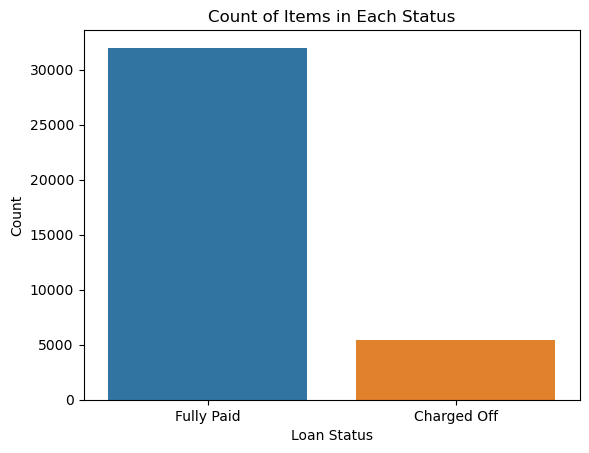

In [227]:
# print(df_3['loan_status'].value_counts())
# df_3['loan_status'].value_counts().plot(kind='bar')


sns.countplot(x='loan_status', data=df_2)
plt.title('Count of Items in Each Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [228]:
# sns.countplot( x='grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], data=df_3_charged_off)
# plt.title('Distribution of Charged Off Loans by Grade')
# plt.xlabel('Category')
# plt.ylabel('Value')
# plt.show()

#### grade

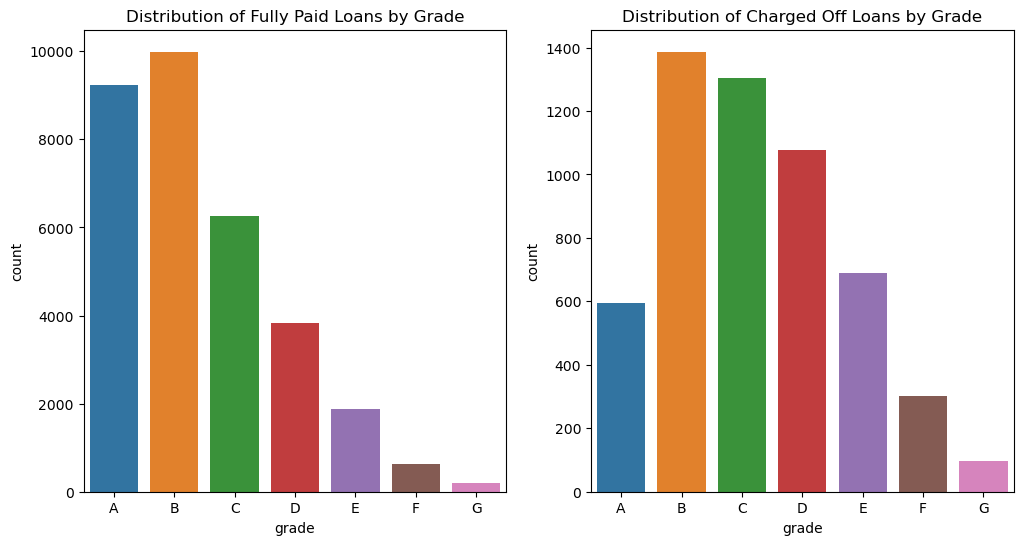

In [229]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

axes[0].set_title('Distribution of Fully Paid Loans by Grade')
axes[1].set_title('Distribution of Charged Off Loans by Grade')

sns.countplot( x='grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], data=df_3_fully_paid, ax=axes[0])
sns.countplot( x='grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], data=df_3_charged_off, ax=axes[1])

plt.show()

#### grades & sub_grade

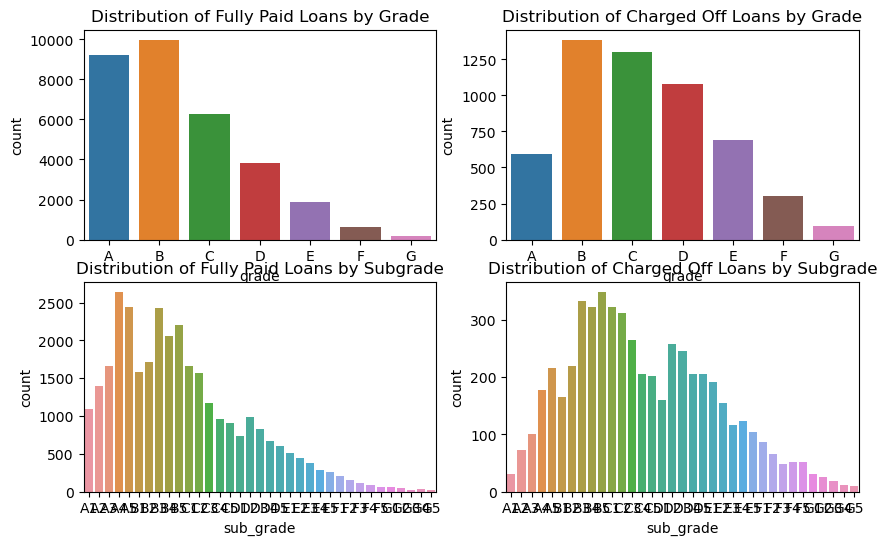

In [230]:
fig, axes = plt.subplots(2,2, figsize=(10, 6))  # 1 row, 2 columns

axes[0][0].set_title('Distribution of Fully Paid Loans by Grade')
axes[0][1].set_title('Distribution of Charged Off Loans by Grade')

## by subgrades
axes[1][0].set_title('Distribution of Fully Paid Loans by Subgrade')
axes[1][1].set_title('Distribution of Charged Off Loans by Subgrade')

sns.countplot( x='grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], data=df_3_fully_paid, ax=axes[0][0])
sns.countplot( x='grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], data=df_3_charged_off, ax=axes[0][1])

sns.countplot( x='sub_grade', order = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], data=df_3_fully_paid, ax=axes[1][0])
sns.countplot( x='sub_grade', order = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], data=df_3_charged_off, ax=axes[1][1])

plt.show()

In [231]:
df_3['sub_grade'] = pd.to_numeric(df_3.sub_grade.apply(lambda x : x[-1]))
df_3_charged_off = df_3[ df_3['loan_status'] == 'Charged Off']
df_3_fully_paid = df_3[ df_3['loan_status'] == 'Fully Paid']

#### sub_grade

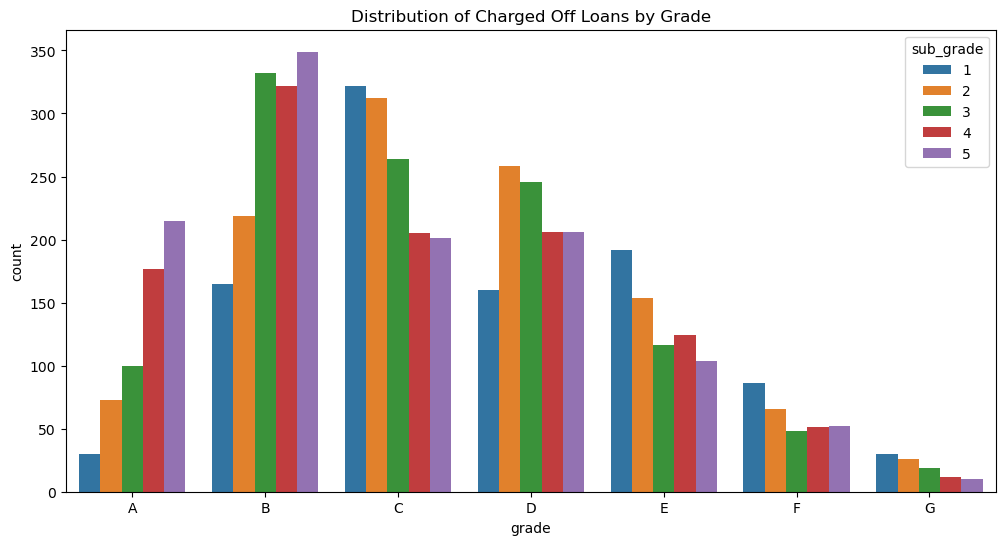

In [232]:
fig, axes = plt.subplots( figsize=(12, 6))  # 1 row, 2 columns

axes.set_title('Distribution of Charged Off Loans by Grade')
sns.countplot( x='grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue = 'sub_grade', data=df_3_charged_off )
plt.show()

#### purpose

purpose
debt_consolidation    2696
other                  611
credit_card            528
small_business         455
home_improvement       327
major_purchase         215
car                    156
medical                104
wedding                 91
moving                  88
house                   57
vacation                53
educational             52
renewable_energy        19
Name: count, dtype: int64


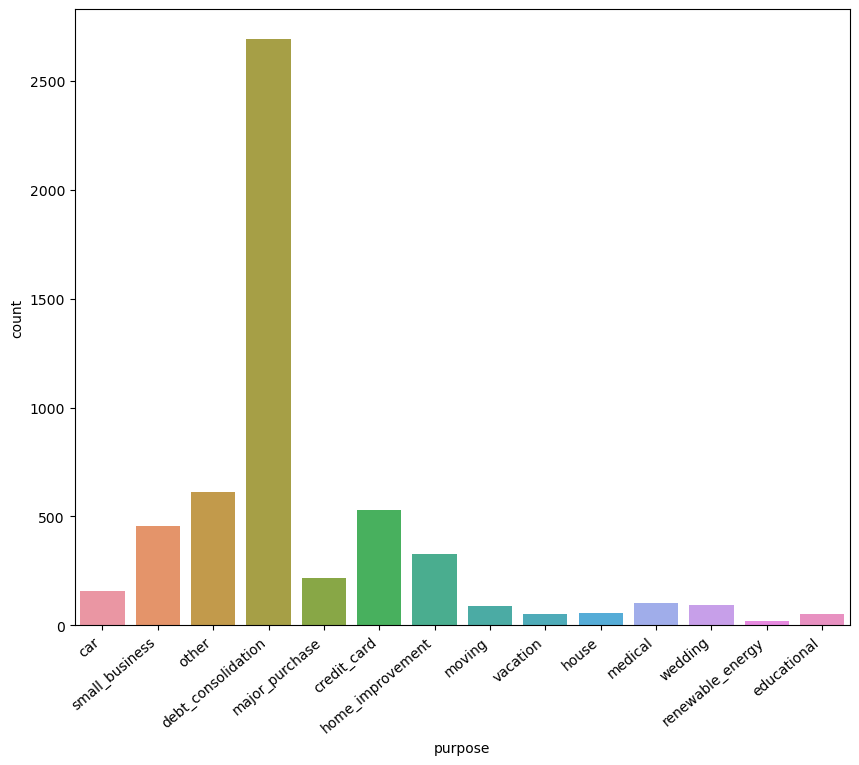

In [233]:
print(df_3_charged_off['purpose'].value_counts())

ig, ax = plt.subplots(figsize = (10,8))
sns.countplot(x ='purpose', data=df_3_charged_off)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

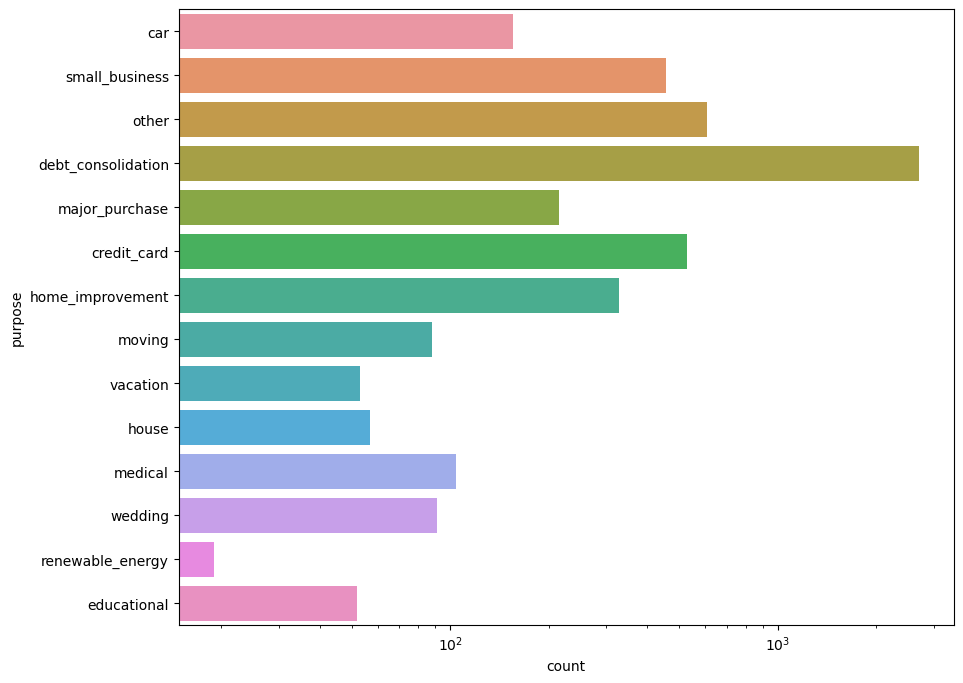

In [234]:
# since the number of records for 'debt_consolidation' is very high,let try using a log scale
ig, ax = plt.subplots(figsize = (10,8))
sns.countplot(y ='purpose', data=df_3_charged_off)
ax.set(xscale = 'log')
plt.show()

In [235]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37456 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37456 non-null  int64  
 1   loan_amnt             37456 non-null  int64  
 2   funded_amnt_inv       37456 non-null  float64
 3   term                  37456 non-null  int64  
 4   int_rate              37456 non-null  float64
 5   installment           37456 non-null  float64
 6   grade                 37456 non-null  object 
 7   sub_grade             37456 non-null  int64  
 8   emp_length            37456 non-null  int64  
 9   home_ownership        37456 non-null  object 
 10  annual_inc            37456 non-null  float64
 11  verification_status   37456 non-null  object 
 12  loan_status           37456 non-null  object 
 13  purpose               37456 non-null  object 
 14  addr_state            37456 non-null  object 
 15  dti                   37

#### home_ownership

home_ownership
RENT        17987
MORTGAGE    16495
OWN          2880
OTHER          94
Name: count, dtype: int64


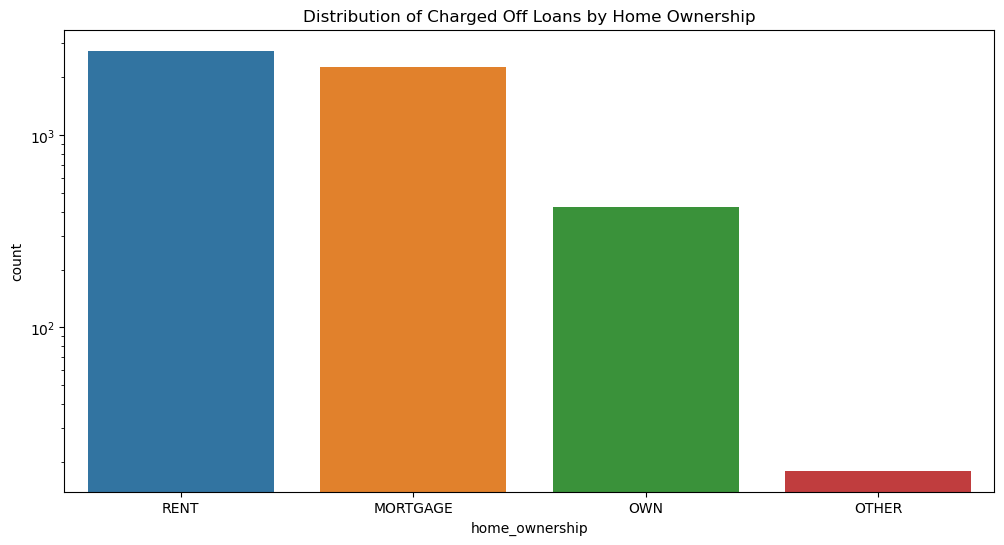

In [236]:
print(df_3['home_ownership'].value_counts())

fig, axes = plt.subplots( figsize=(12, 6))
axes.set_title('Distribution of Charged Off Loans by Home Ownership')
sns.countplot( x='home_ownership', order=[ 'RENT', 'MORTGAGE', 'OWN', 'OTHER'], data=df_3_charged_off)
axes.set(yscale = 'log')  # since the count of 'OTHER' is very low
plt.show() 

home_ownership
RENT        17987
MORTGAGE    16495
OWN          2880
OTHER          94
Name: count, dtype: int64


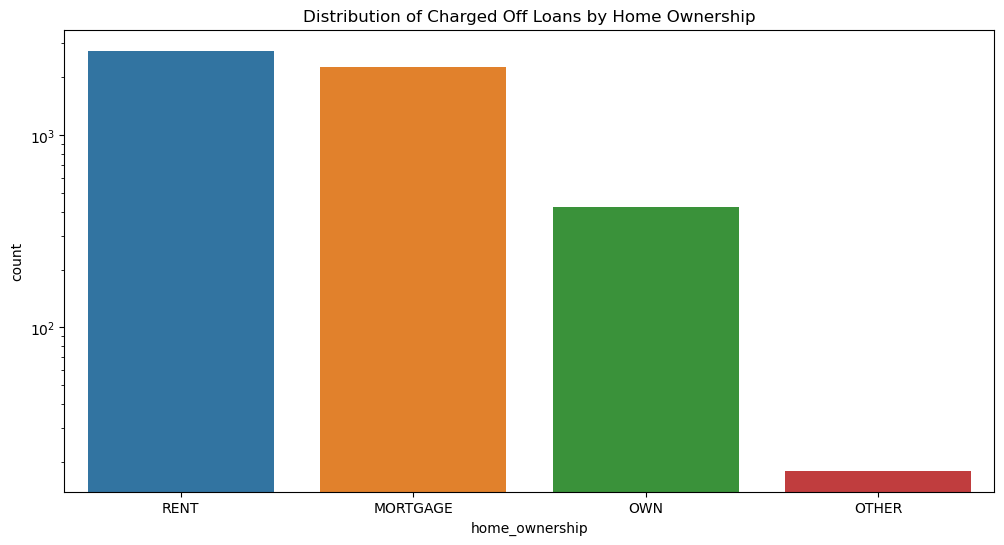

In [237]:
print(df_3['home_ownership'].value_counts())

fig, axes = plt.subplots( figsize=(12, 6))
axes.set_title('Distribution of Charged Off Loans by Home Ownership')
sns.countplot( x='home_ownership', order=[ 'RENT', 'MORTGAGE', 'OWN', 'OTHER'], data=df_3_charged_off)
axes.set(yscale = 'log')  # since the count of 'OTHER' is very low
plt.show() 

#### verification_status

verification_status
Verified           2026
Not Verified       2007
Source Verified    1419
Name: count, dtype: int64


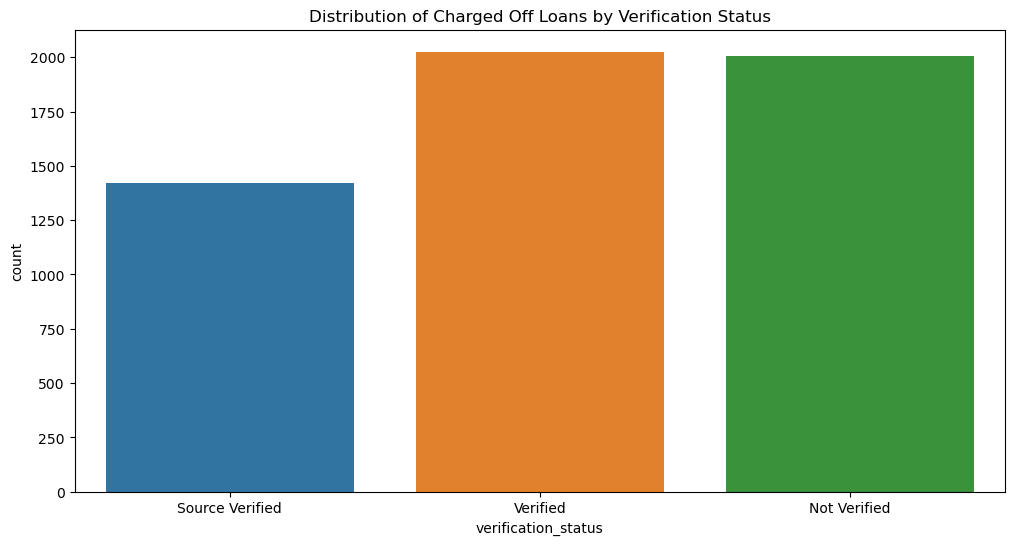

In [238]:
print(df_3_charged_off['verification_status'].value_counts())

fig, axes = plt.subplots( figsize=(12, 6))
axes.set_title('Distribution of Charged Off Loans by Verification Status')
sns.countplot( x='verification_status', order=[ 'Source Verified', 'Verified','Not Verified',], data=df_3_charged_off)
plt.show() 

#### revol_util

In [239]:
df_3['revol_util'] = df_3['revol_util'].str.extract('(\d+.\d+)').astype(float)

df_3['revol_util_groups'] = pd.cut(df_3['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])

df_3_charged_off = df_3[ df_3['loan_status'] == 'Charged Off']
df_3_fully_paid = df_3[ df_3['loan_status'] == 'Fully Paid']

revol_util_groups
60-80     1212
80-100    1169
40-60     1073
20-40      795
0-20       546
Name: count, dtype: int64


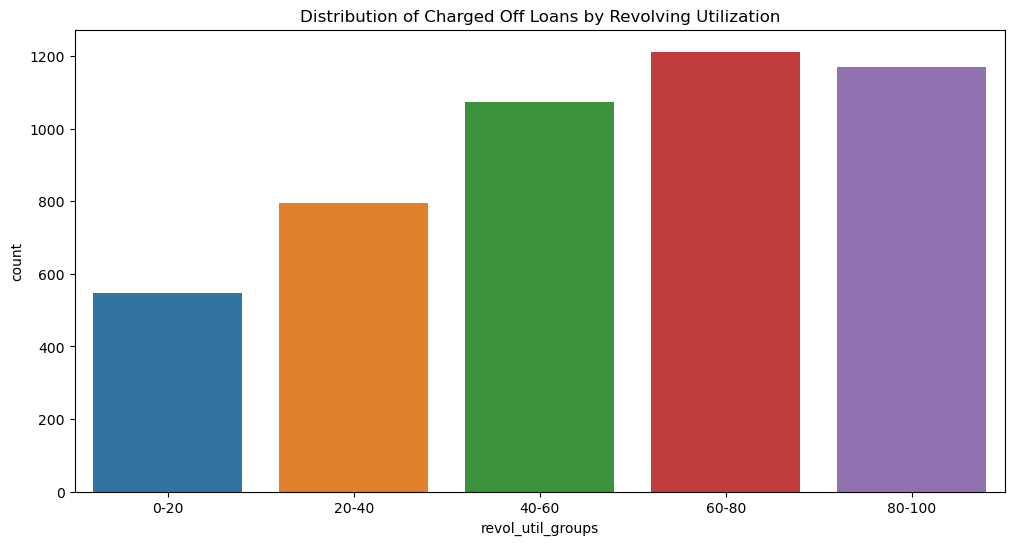

In [240]:
print(df_3_charged_off['revol_util_groups'].value_counts())

fig, axes = plt.subplots( figsize=(12, 6))
axes.set_title('Distribution of Charged Off Loans by Revolving Utilization')
sns.countplot( x='revol_util_groups', data=df_3_charged_off)
plt.show()

### Numerical data

In [241]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37456 entries, 0 to 39680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    37456 non-null  int64   
 1   loan_amnt             37456 non-null  int64   
 2   funded_amnt_inv       37456 non-null  float64 
 3   term                  37456 non-null  int64   
 4   int_rate              37456 non-null  float64 
 5   installment           37456 non-null  float64 
 6   grade                 37456 non-null  object  
 7   sub_grade             37456 non-null  int64   
 8   emp_length            37456 non-null  int64   
 9   home_ownership        37456 non-null  object  
 10  annual_inc            37456 non-null  float64 
 11  verification_status   37456 non-null  object  
 12  loan_status           37456 non-null  object  
 13  purpose               37456 non-null  object  
 14  addr_state            37456 non-null  object  
 15  dti    

In [242]:
# function to create bins and show chart

def count_plot_with_custom_bins(df_x,column, title, bins, labels, log_scale=False):
    df_y = df_x.copy()
    new_column = column + '_groups'

    df_y[new_column] = pd.cut(df_y[column], bins=bins,precision =0,labels=labels)

    fig, axes = plt.subplots( figsize=(12, 6))
    axes.set_title(title)
    sns.countplot( x=new_column, data=df_y, order=labels)
    if log_scale:
        axes.set(yscale = 'log')
    plt.show()

#### loan_amnt

1200.0 35000.0 33800.0


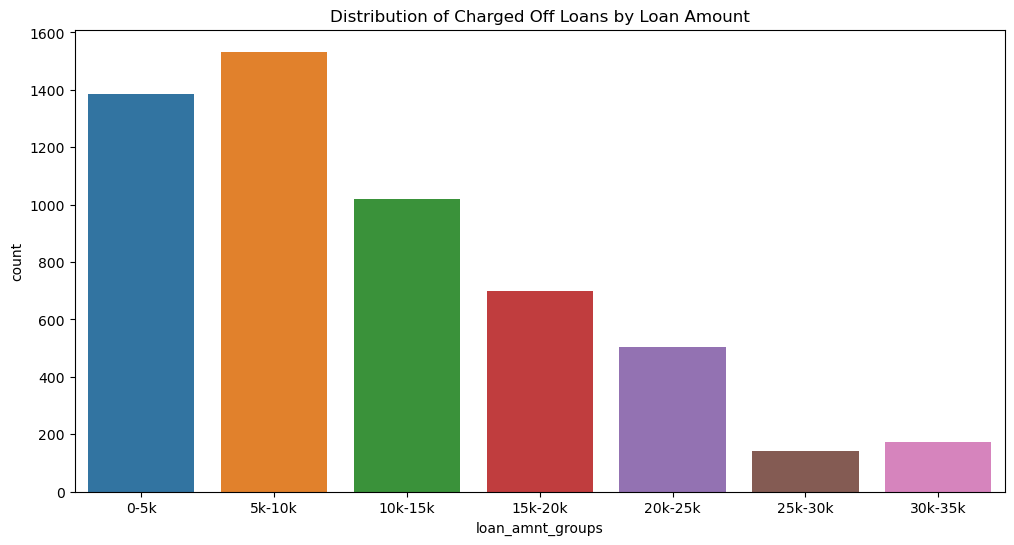

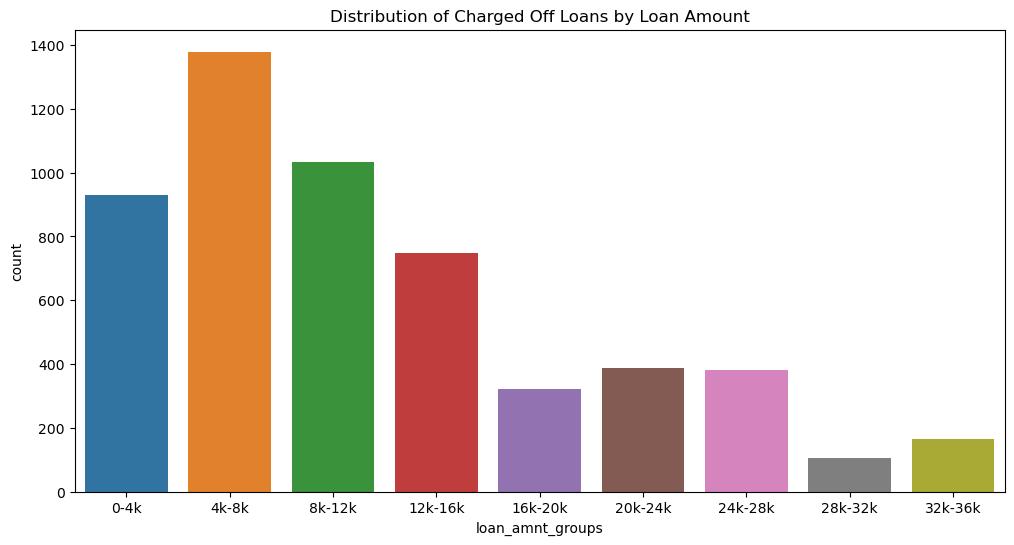

In [243]:
# print(df_3_charged_off['loan_amnt'].describe( percentiles=[0.25, 0.5, 0.75, 0.9, 0.95,0.98, 0.99,1]))

min_loan_amnt = df_3['loan_amnt'].quantile(0.01)
max_loan_amnt = df_3['loan_amnt'].quantile(0.99)
diff = max_loan_amnt - min_loan_amnt

print(min_loan_amnt, max_loan_amnt, diff)
#min = 1200
#max = 35000


no_of_bins = 7
bin_labels= [
    '0-5k',
    '5k-10k',
    '10k-15k',
    '15k-20k',
    '20k-25k',
    '25k-30k',
    '30k-35k'
]

count_plot_with_custom_bins(df_3_charged_off, 'loan_amnt', 'Distribution of Charged Off Loans by Loan Amount',  bins=no_of_bins, labels=bin_labels, log_scale=False)


no_of_bins = 9
bin_labels= [
    '0-4k',
    '4k-8k',
    '8k-12k',
    '12k-16k',
    '16k-20k',
    '20k-24k',
    '24k-28k',
    '28k-32k',
    '32k-36k'
]

count_plot_with_custom_bins(df_3_charged_off, 'loan_amnt', 'Distribution of Charged Off Loans by Loan Amount',  bins=no_of_bins, labels=bin_labels, log_scale=False)




#### term

term
36    3072
60    2380
Name: count, dtype: int64


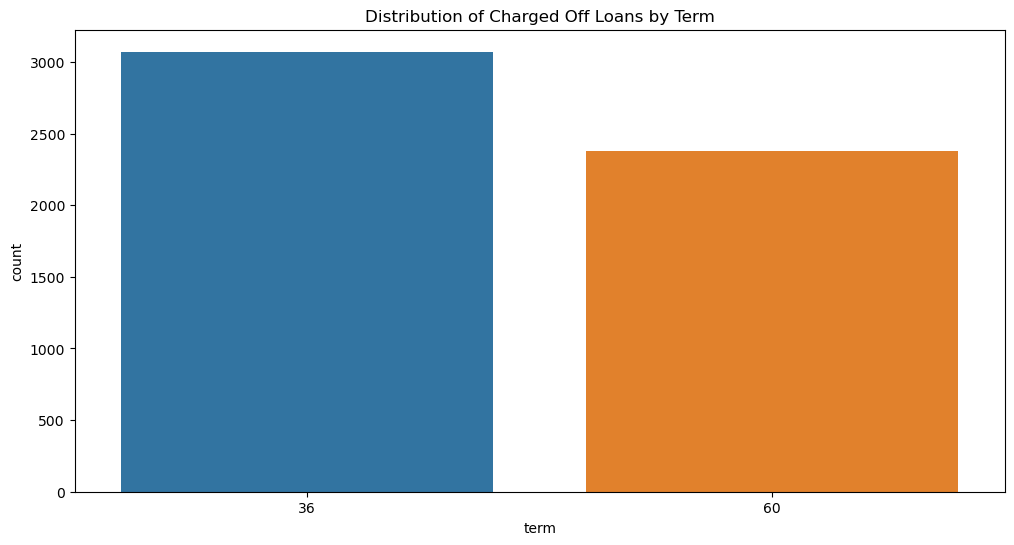

In [244]:
print(df_3_charged_off['term'].value_counts())

fig, axes = plt.subplots( figsize=(12, 6))
axes.set_title('Distribution of Charged Off Loans by Term')
sns.countplot( x='term', data=df_3_charged_off)
plt.show()

#### int_rate

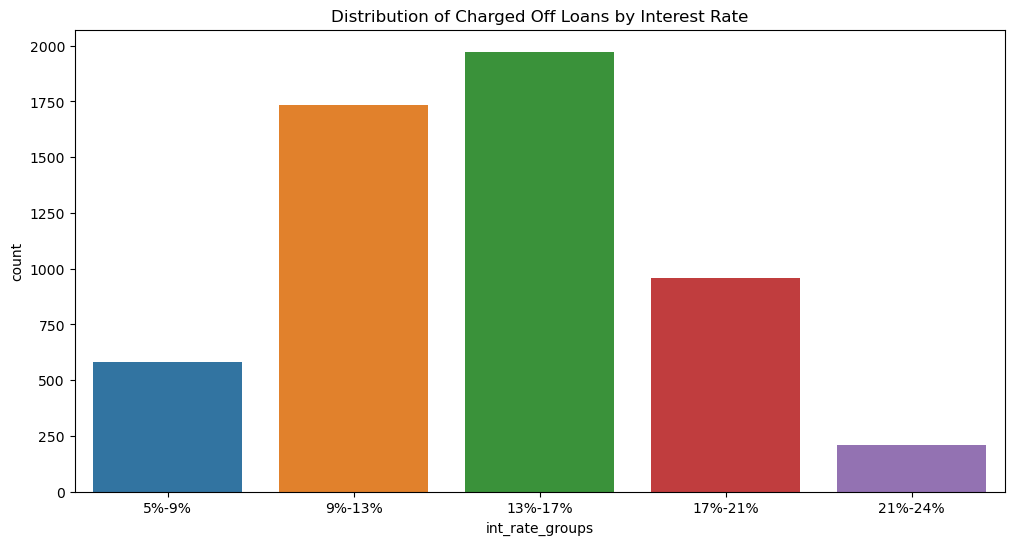

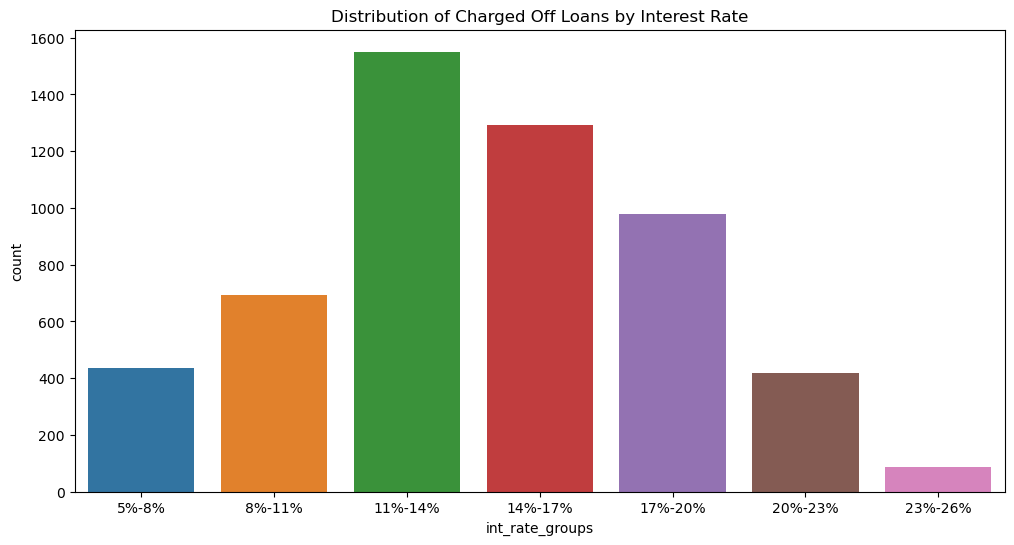

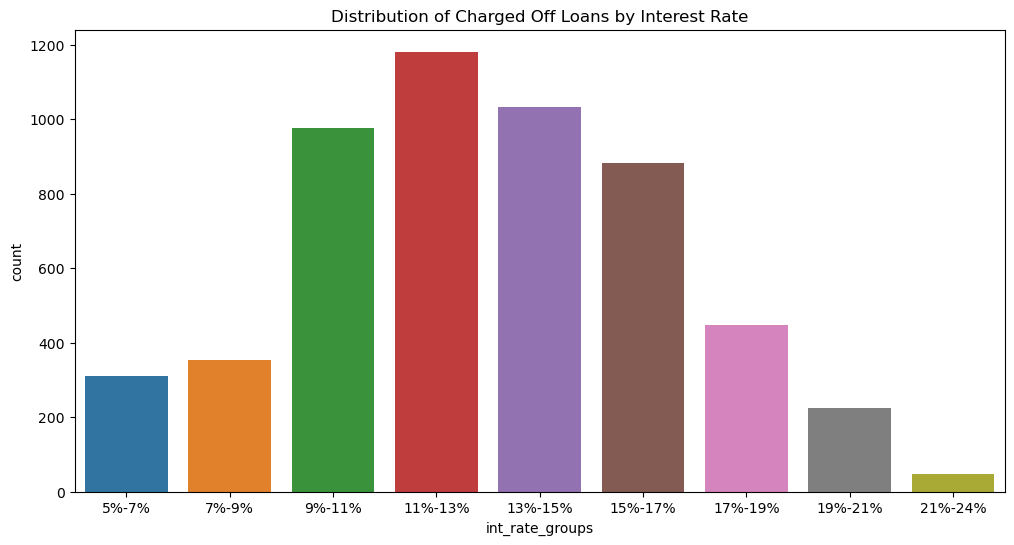

In [245]:
no_of_bins = 5
bin_labels= [
    '5%-9%',
    '9%-13%',
    '13%-17%',
    '17%-21%',
    '21%-24%'
]

count_plot_with_custom_bins(df_3_charged_off, 'int_rate', 'Distribution of Charged Off Loans by Interest Rate',  bins=no_of_bins, labels=bin_labels, log_scale=False)

no_of_bins = 7
bin_labels= [
    '5%-8%',
    '8%-11%',
    '11%-14%',
    '14%-17%',
    '17%-20%',
    '20%-23%',
    '23%-26%'
]

count_plot_with_custom_bins(df_3_charged_off, 'int_rate', 'Distribution of Charged Off Loans by Interest Rate',  bins=no_of_bins, labels=bin_labels, log_scale=False)


no_of_bins = 9
bin_labels = [
    '5%-7%', '7%-9%', '9%-11%', '11%-13%', '13%-15%', '15%-17%', '17%-19%', '19%-21%', '21%-24%'
]
count_plot_with_custom_bins(df_3_charged_off, 'int_rate', 'Distribution of Charged Off Loans by Interest Rate',  bins=no_of_bins, labels=bin_labels, log_scale=False)

#### installments

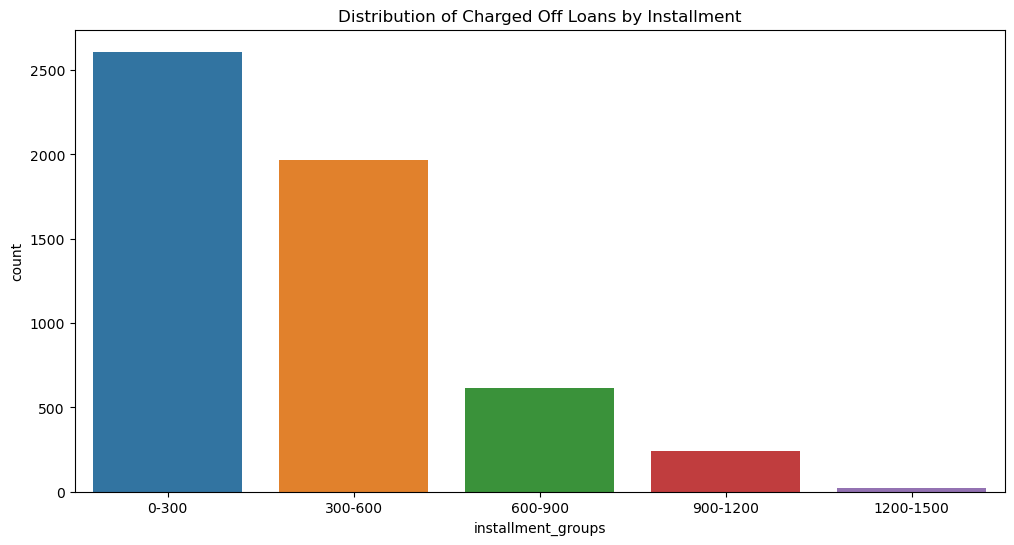

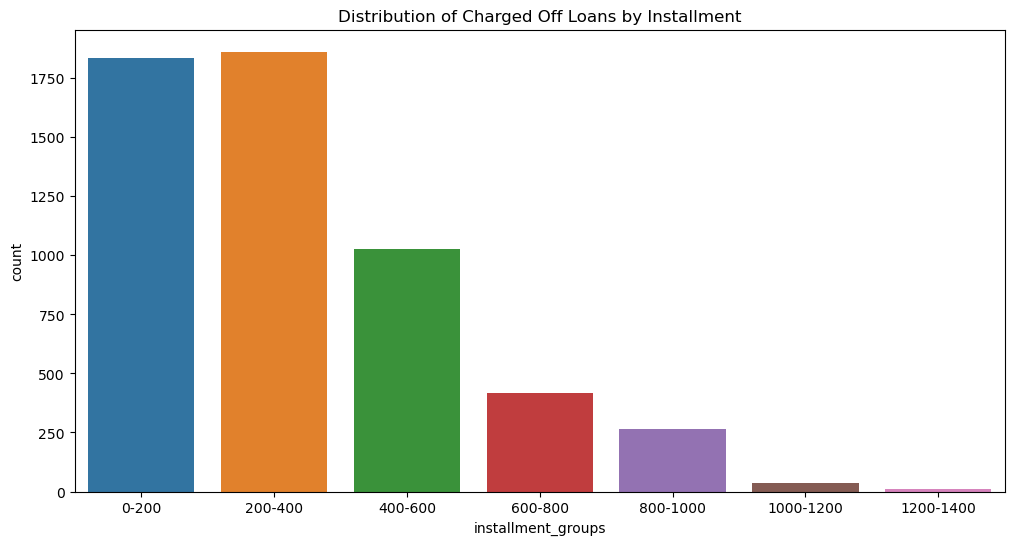

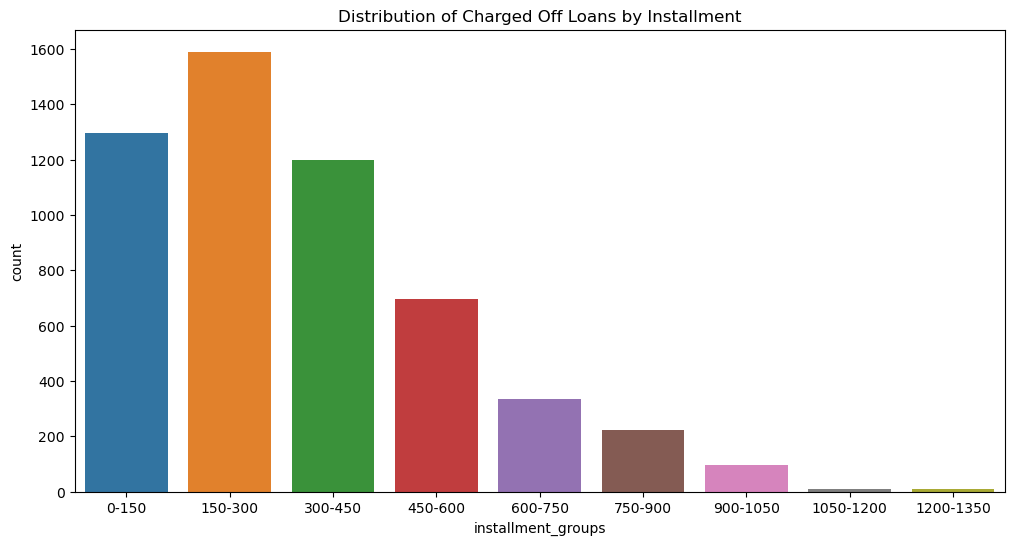

In [246]:

# min - 16.08 
# max - 1305.19

no_of_bins = 5
bin_labels = [
    '0-300', '300-600', '600-900', '900-1200', '1200-1500'
]

count_plot_with_custom_bins(df_3_charged_off, 'installment', 'Distribution of Charged Off Loans by Installment',  bins=no_of_bins, labels=bin_labels, log_scale=False)


no_of_bins = 7
bin_labels = [
    '0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400'
]

count_plot_with_custom_bins(df_3_charged_off, 'installment', 'Distribution of Charged Off Loans by Installment',  bins=no_of_bins, labels=bin_labels, log_scale=False)


no_of_bins = 9
bin_labels = [
    '0-150', '150-300', '300-450', '450-600', '600-750', '750-900', '900-1050', '1050-1200', '1200-1350'
]

count_plot_with_custom_bins(df_3_charged_off, 'installment', 'Distribution of Charged Off Loans by Installment',  bins=no_of_bins, labels=bin_labels, log_scale=False)


#### emp_length

emp_length
10    1514
1     1043
2      549
3      545
5      451
4      442
6      297
7      257
8      199
9      155
Name: count, dtype: int64


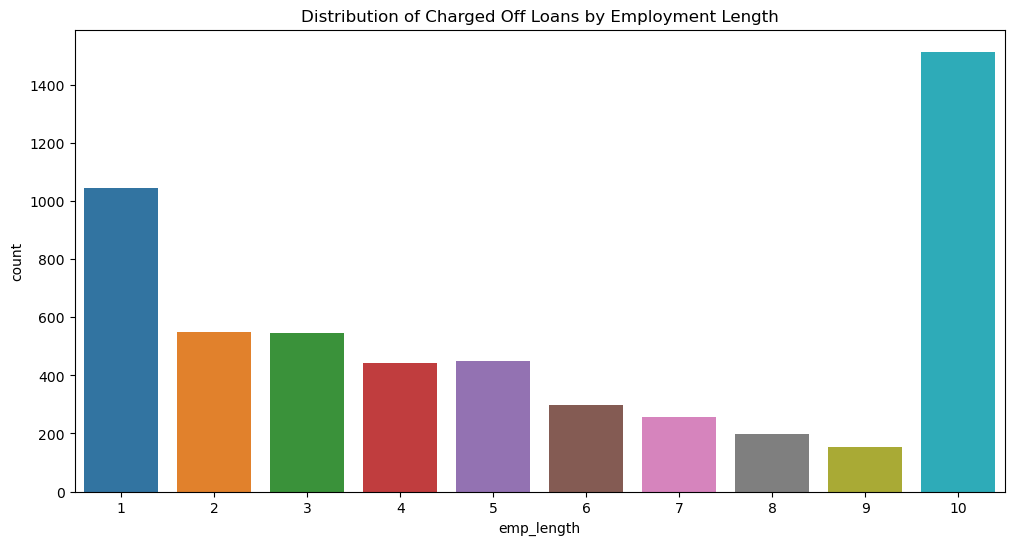

In [247]:
print(df_3_charged_off['emp_length'].value_counts())

fig, axes = plt.subplots( figsize=(12, 6))
axes.set_title('Distribution of Charged Off Loans by Employment Length')
sns.countplot( x='emp_length', data=df_3_charged_off)
plt.show()

#### annual_inc

In [248]:
df_3['annual_inc'].describe( percentiles=[.25, .5, .75, .9, .95, .99])

count     37456.000000
mean      65409.163978
std       35122.786624
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80400.000000
90%      111008.000000
95%      135000.000000
99%      187000.000000
max      234996.000000
Name: annual_inc, dtype: float64

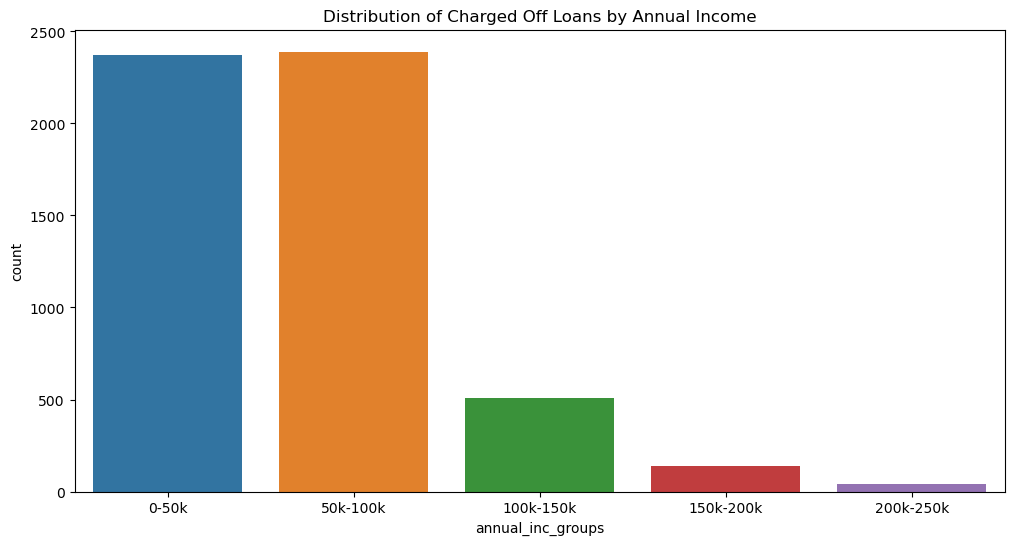

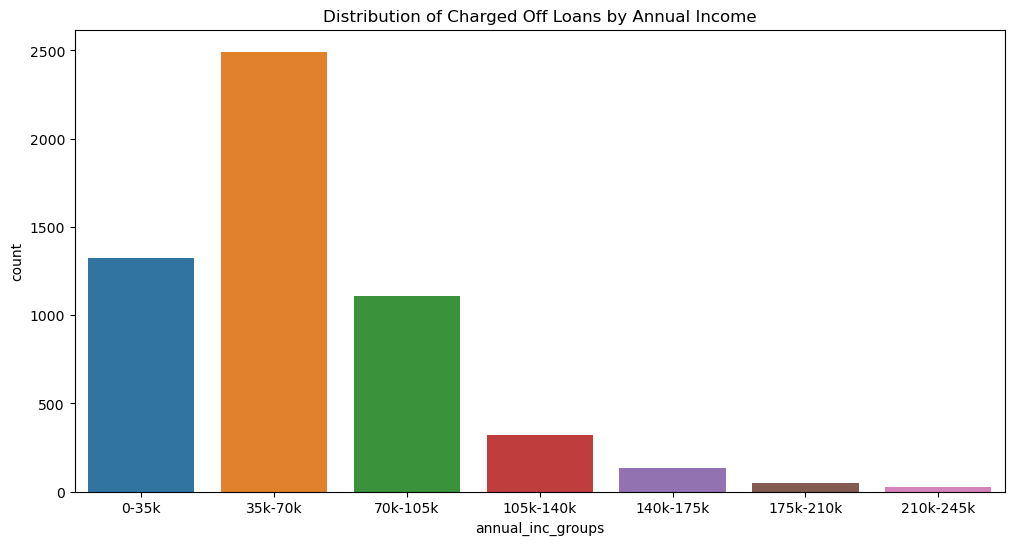

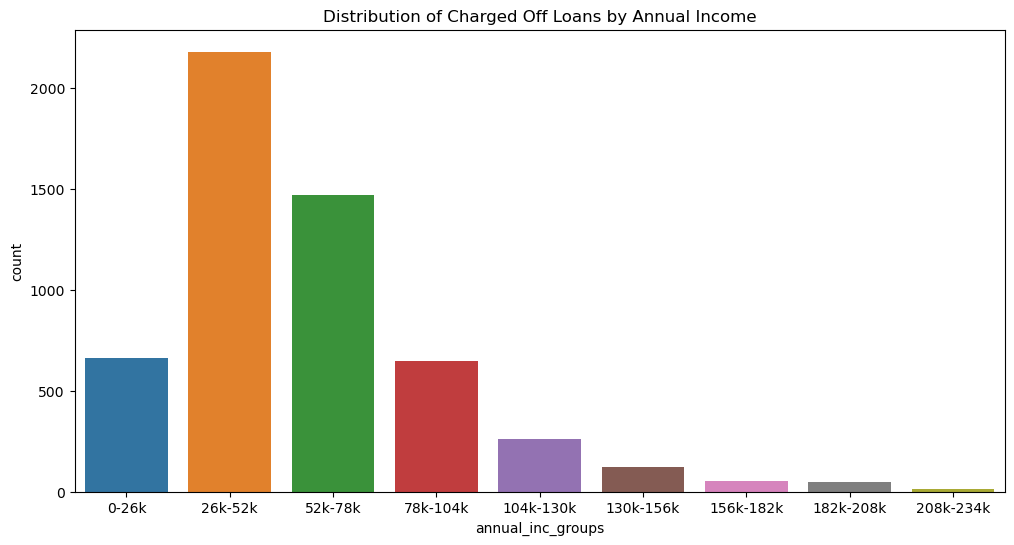

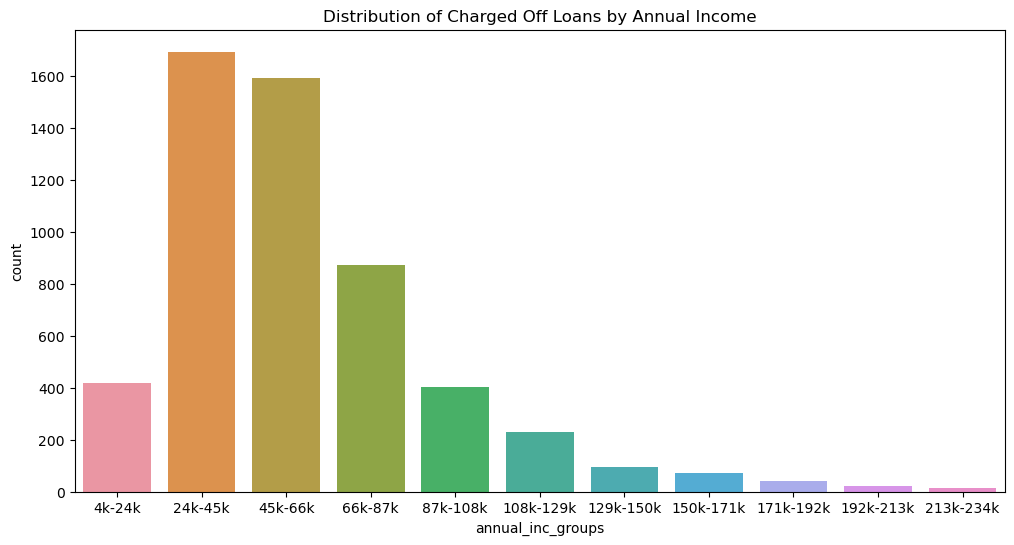

In [249]:
min_value = df_3['annual_inc'].min()  #4000.0
max_value = df_3['annual_inc'].max()  #234996.0

no_of_bins = 5
bin_labels = [
    '0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k'
]
count_plot_with_custom_bins(df_3_charged_off, 'annual_inc', 'Distribution of Charged Off Loans by Annual Income',  bins=no_of_bins, labels=bin_labels, log_scale=False)


no_of_bins = 7
bin_labels = [
    '0-35k', '35k-70k', '70k-105k', '105k-140k', '140k-175k', '175k-210k', '210k-245k' 
]
count_plot_with_custom_bins(df_3_charged_off, 'annual_inc', 'Distribution of Charged Off Loans by Annual Income',  bins=no_of_bins, labels=bin_labels, log_scale=False)

no_of_bins = 9
bin_labels = [
    '0-26k', '26k-52k', '52k-78k', '78k-104k', '104k-130k', '130k-156k', '156k-182k', '182k-208k', '208k-234k'
]

count_plot_with_custom_bins(df_3_charged_off, 'annual_inc', 'Distribution of Charged Off Loans by Annual Income',  bins=no_of_bins, labels=bin_labels, log_scale=False)

no_of_bins = 11
bin_labels = [
  '4k-24k',
'24k-45k',
'45k-66k',
'66k-87k',
'87k-108k',
'108k-129k',
'129k-150k',
'150k-171k',
'171k-192k',
'192k-213k',
'213k-234k'
]
count_plot_with_custom_bins(df_3_charged_off, 'annual_inc', 'Distribution of Charged Off Loans by Annual Income',  bins=no_of_bins, labels=bin_labels, log_scale=False)

#### dti

0.0 29.85


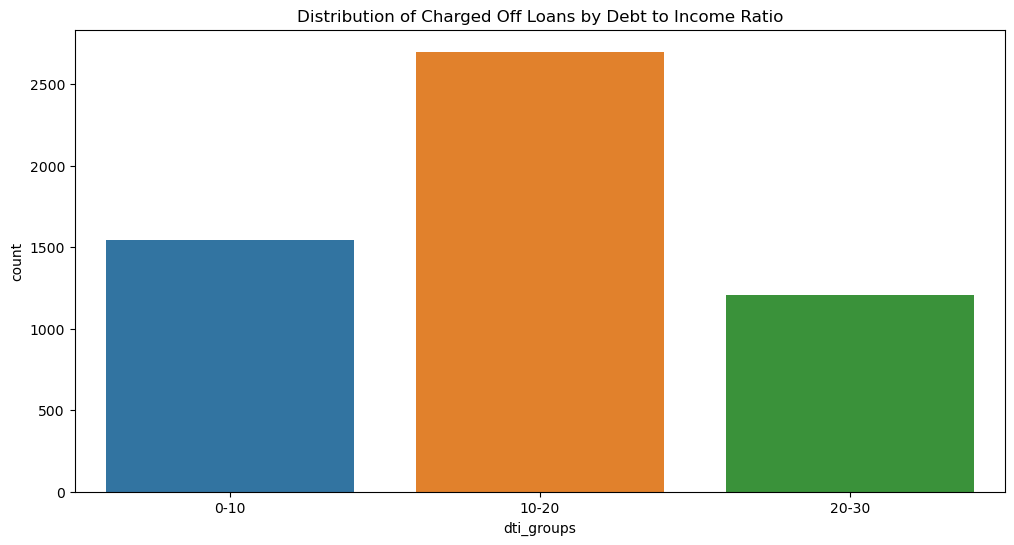

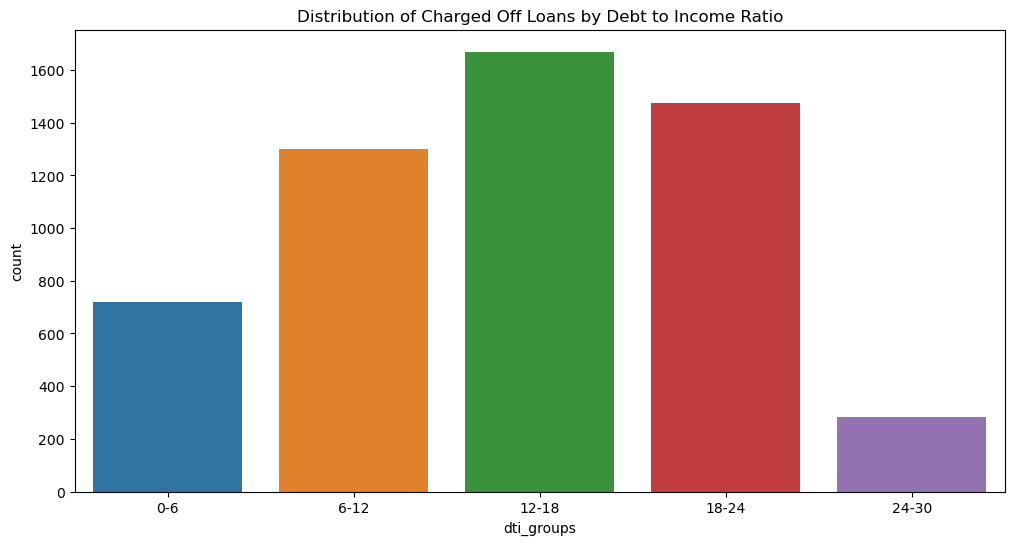

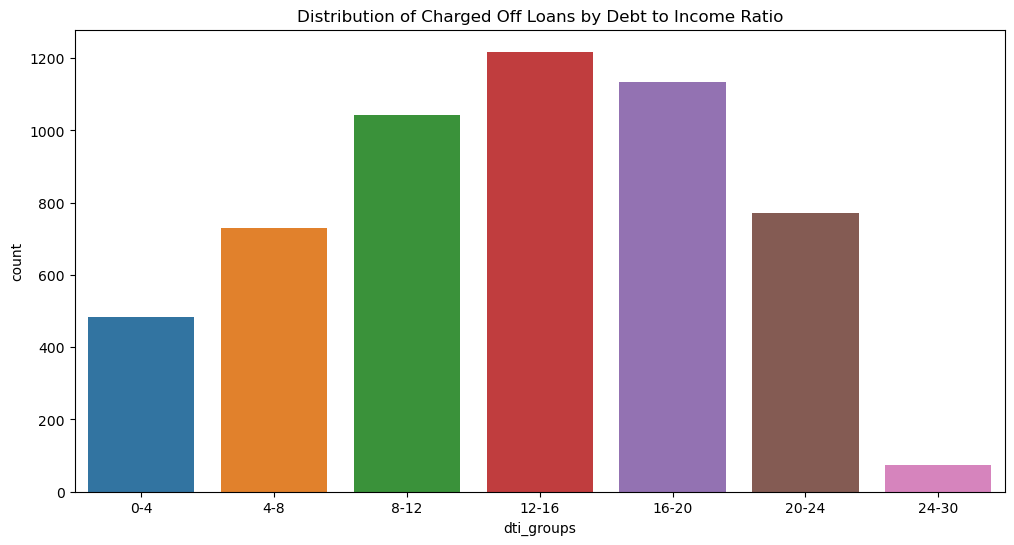

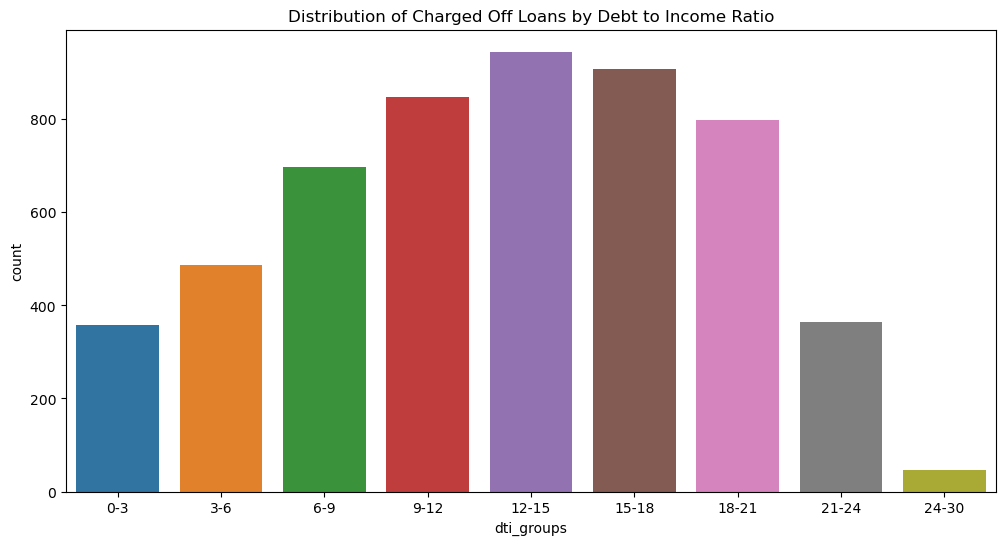

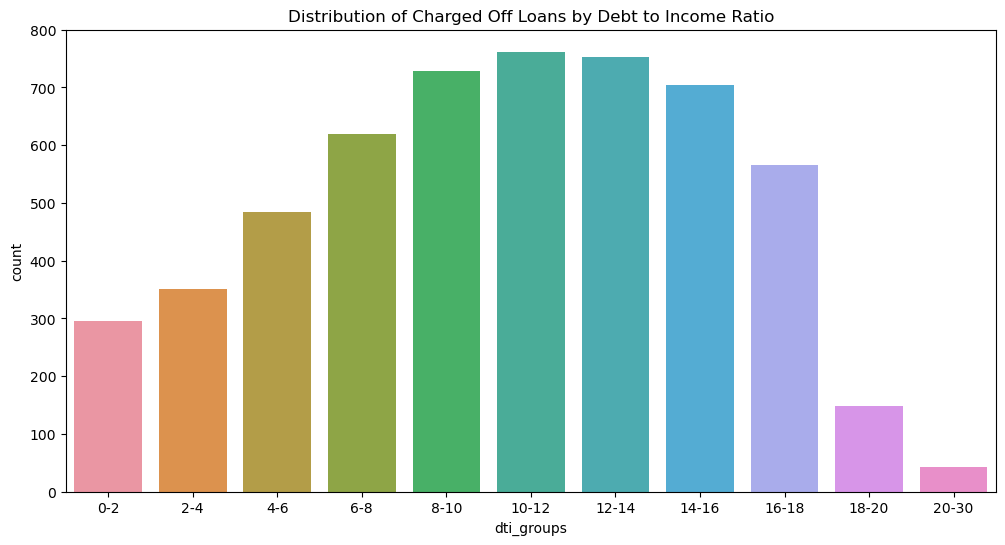

In [250]:

min_value = df_3_charged_off['dti'].min()  #0.0
max_value = df_3_charged_off['dti'].max()  #29.99
print(min_value, max_value)

no_of_bins = 3
bin_labels = [
    '0-10', '10-20', '20-30'
]
count_plot_with_custom_bins(df_3_charged_off, 'dti', 'Distribution of Charged Off Loans by Debt to Income Ratio',  bins=no_of_bins, labels=bin_labels, log_scale=False)

no_of_bins = 5
bin_labels = [
    '0-6', '6-12', '12-18', '18-24', '24-30'
]
count_plot_with_custom_bins(df_3_charged_off, 'dti', 'Distribution of Charged Off Loans by Debt to Income Ratio',  bins=no_of_bins, labels=bin_labels, log_scale=False)

no_of_bins = 7
bin_labels = [
    '0-4', '4-8', '8-12', '12-16', '16-20', '20-24', '24-30'
]
count_plot_with_custom_bins(df_3_charged_off, 'dti', 'Distribution of Charged Off Loans by Debt to Income Ratio',  bins=no_of_bins, labels=bin_labels, log_scale=False)

no_of_bins = 9
bin_labels = [
    '0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24', '24-30'
]
count_plot_with_custom_bins(df_3_charged_off, 'dti', 'Distribution of Charged Off Loans by Debt to Income Ratio',  bins=no_of_bins, labels=bin_labels, log_scale=False)

no_of_bins = 11
bin_labels = [
    '0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-30'
]
count_plot_with_custom_bins(df_3_charged_off, 'dti', 'Distribution of Charged Off Loans by Debt to Income Ratio',  bins=no_of_bins, labels=bin_labels, log_scale=False)

#### inq_last_6mths

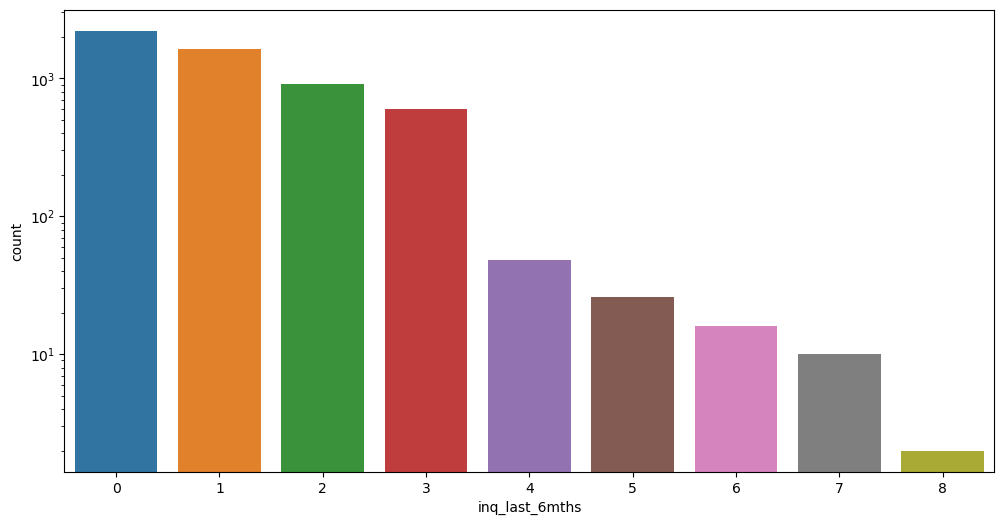

In [251]:
# print(df_3_charged_off['inq_last_6mths'].value_counts())

fig, axes = plt.subplots( figsize=(12, 6))
sns.countplot( x='inq_last_6mths', data=df_3_charged_off)
axes.set(yscale = 'log')
plt.show()

#### open_acc

2 38


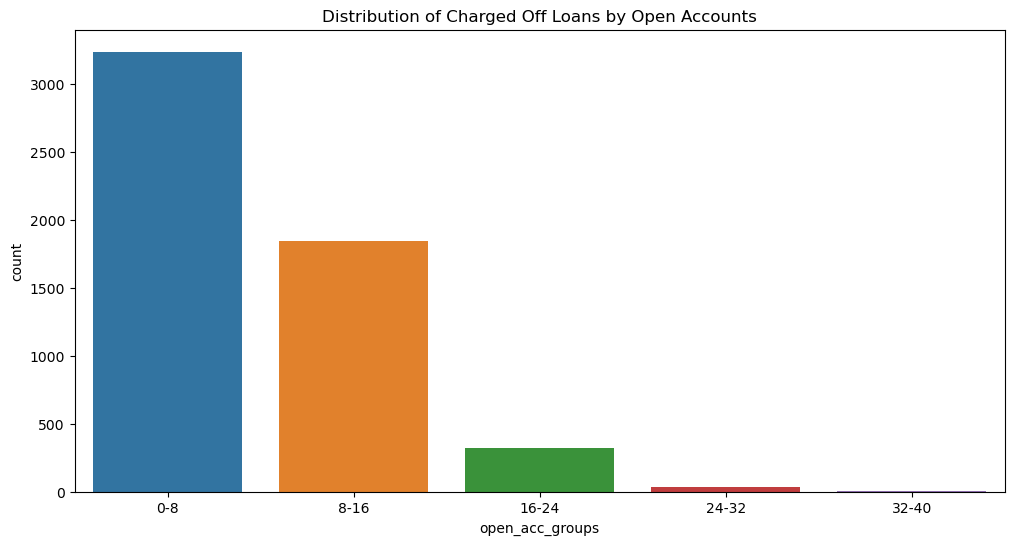

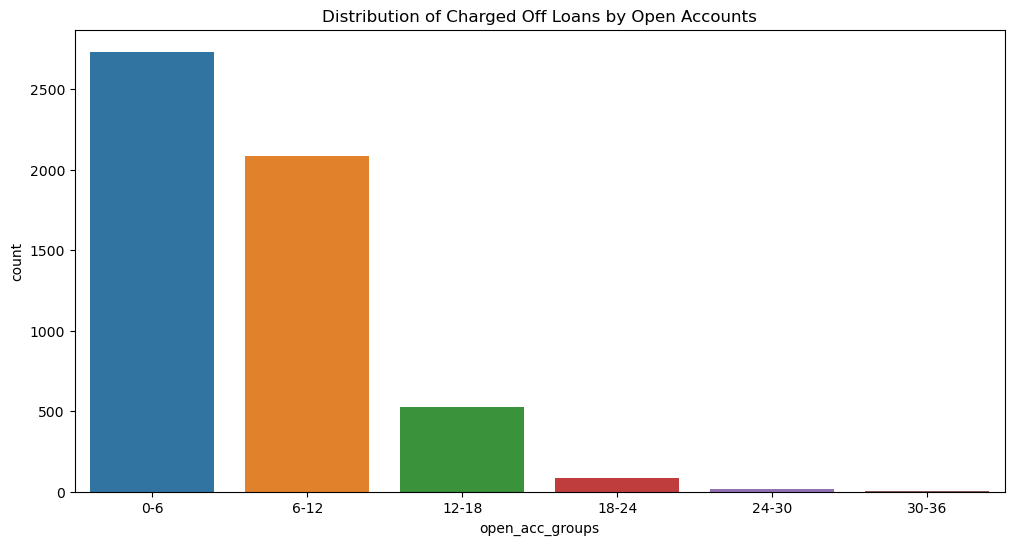

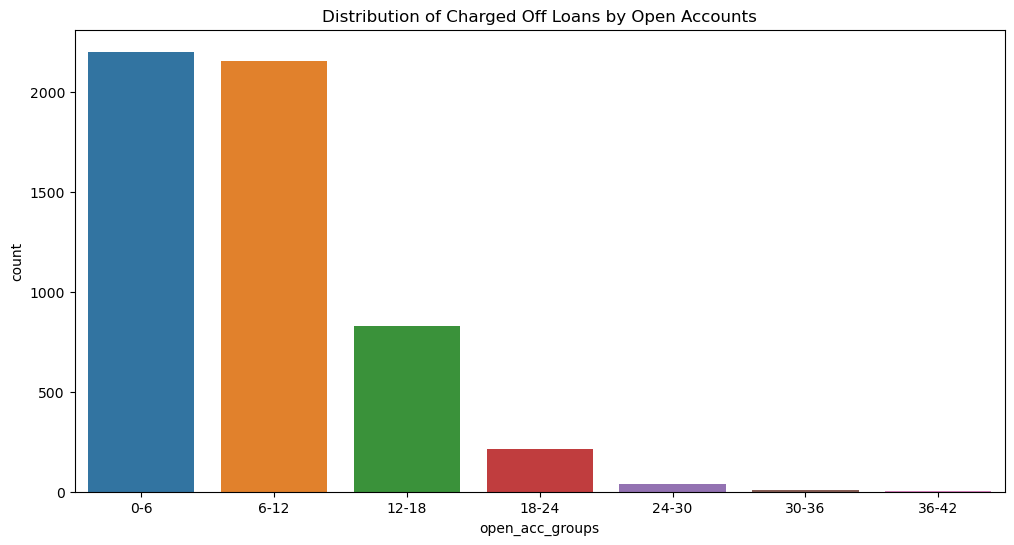

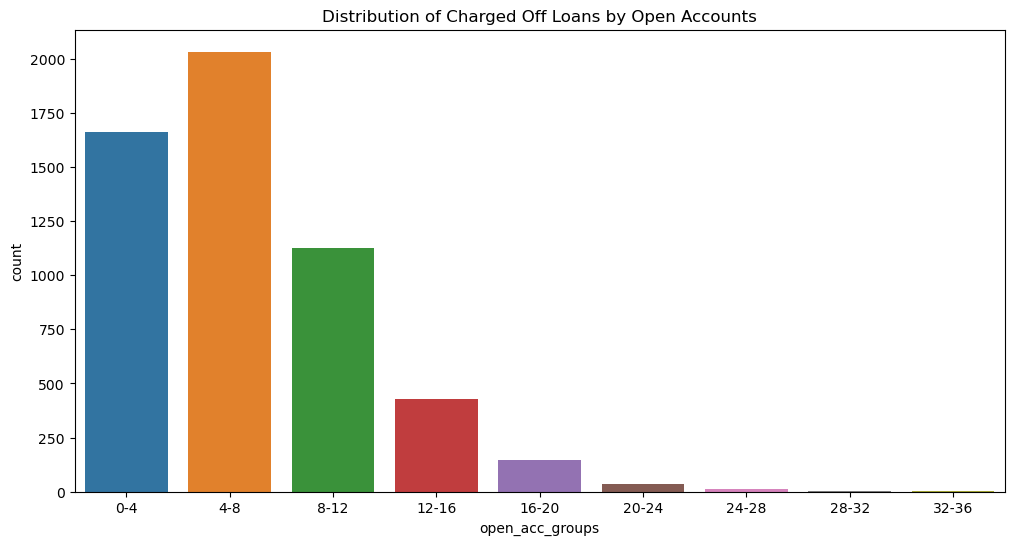

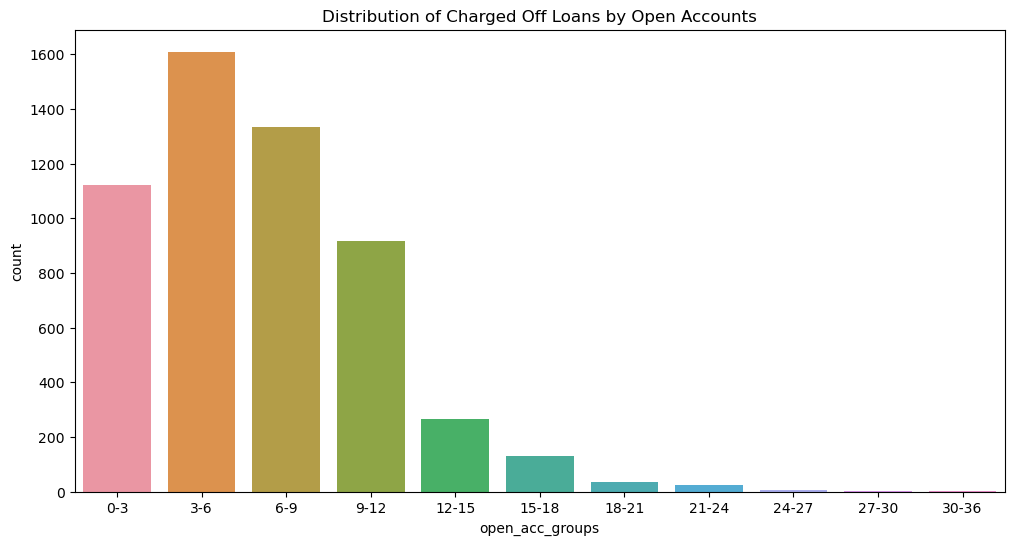

In [252]:
print(df_3_charged_off['open_acc'].min(), df_3_charged_off['open_acc'].max())

# min - 2
# max - 38

no_of_bins = 5
bin_labels = [
    '0-8', '8-16', '16-24', '24-32', '32-40'
]
count_plot_with_custom_bins(df_3_charged_off, 'open_acc', 'Distribution of Charged Off Loans by Open Accounts',  bins=no_of_bins, labels=bin_labels, log_scale=False)

# min - 2
# max - 38

no_of_bins = 6
bin_labels = [
    '0-6', '6-12', '12-18', '18-24', '24-30', '30-36'
]
count_plot_with_custom_bins(df_3_charged_off, 'open_acc', 'Distribution of Charged Off Loans by Open Accounts',  bins=no_of_bins, labels=bin_labels, log_scale=False)

# min - 2
# max - 38

no_of_bins = 7
bin_labels = [
    '0-6', '6-12', '12-18', '18-24', '24-30', '30-36', '36-42'
]
count_plot_with_custom_bins(df_3_charged_off, 'open_acc', 'Distribution of Charged Off Loans by Open Accounts',  bins=no_of_bins, labels=bin_labels, log_scale=False)

# min - 2
# max - 38

no_of_bins = 9
bin_labels = [
    '0-4', '4-8', '8-12', '12-16', '16-20', '20-24', '24-28', '28-32', '32-36'
]
count_plot_with_custom_bins(df_3_charged_off, 'open_acc', 'Distribution of Charged Off Loans by Open Accounts',  bins=no_of_bins, labels=bin_labels, log_scale=False)

# min - 2
# max - 38
no_of_bins = 11
bin_labels = [
    '0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24', '24-27', '27-30', '30-36'
]
count_plot_with_custom_bins(df_3_charged_off, 'open_acc', 'Distribution of Charged Off Loans by Open Accounts',  bins=no_of_bins, labels=bin_labels, log_scale=False)


#### addr_state

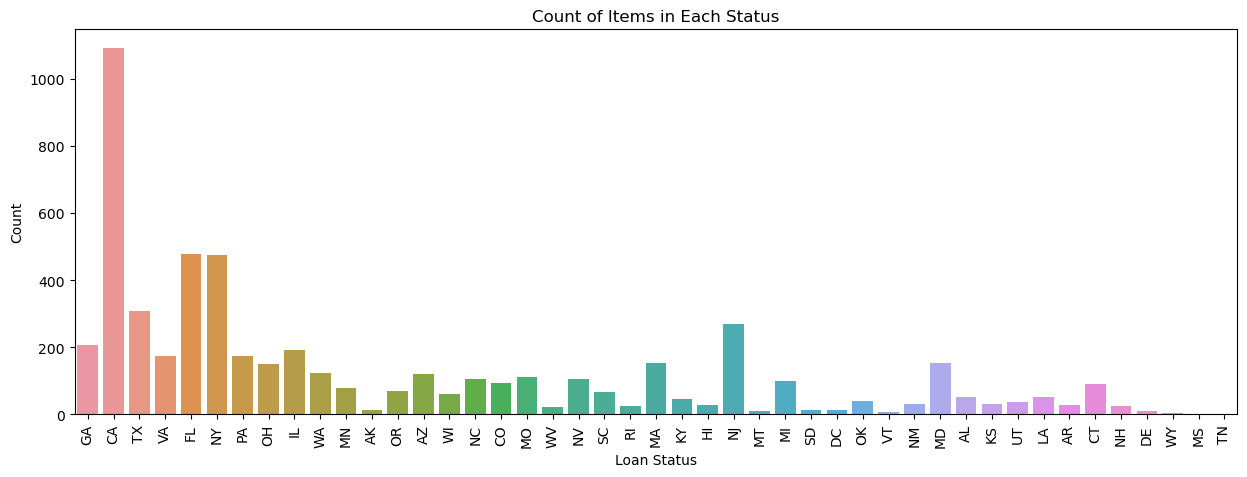

In [253]:
fig, axes = plt.subplots(figsize=(15, 5))

sns.countplot(x='addr_state', data=df_3_charged_off)
plt.title('Count of Items in Each Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
# rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

### Observations from Uni-variate Analysis

From the univariate analysis, we can make the following observations that there is more possibility of defaulting when:
* When the 'grades' is 'B'
* When the 'sub_grade' is 'B5'
* When the purpose is 'debt_consolidation'
* When the 'home_ownership' is 'RENT'
* When the 'term' is '36 months'
* When the 'revol_util' is between '60-80'
* When the 'loan_amnt' is between '4k-8k'
* When the 'int_rate' is between '11%-14%'
* When the 'installment' is between '150-300'
* When the 'emp_length' is between '10+ years'
* When the 'annual_inc' is between '26k-52k'
* When the 'dti' is between '10-20'
* When the 'open_acc' is between '3-6'
* When the 'addr_state' is 'CA'

## Bi-variate Analysis

In [254]:
# df_3.info()

object_cols = df_3.select_dtypes(include=['object']).columns.tolist()
int_float_cols = df_3.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(object_cols)
print(int_float_cols)

['grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line']
['id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'sub_grade', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies']


#### annual_inc X purpose

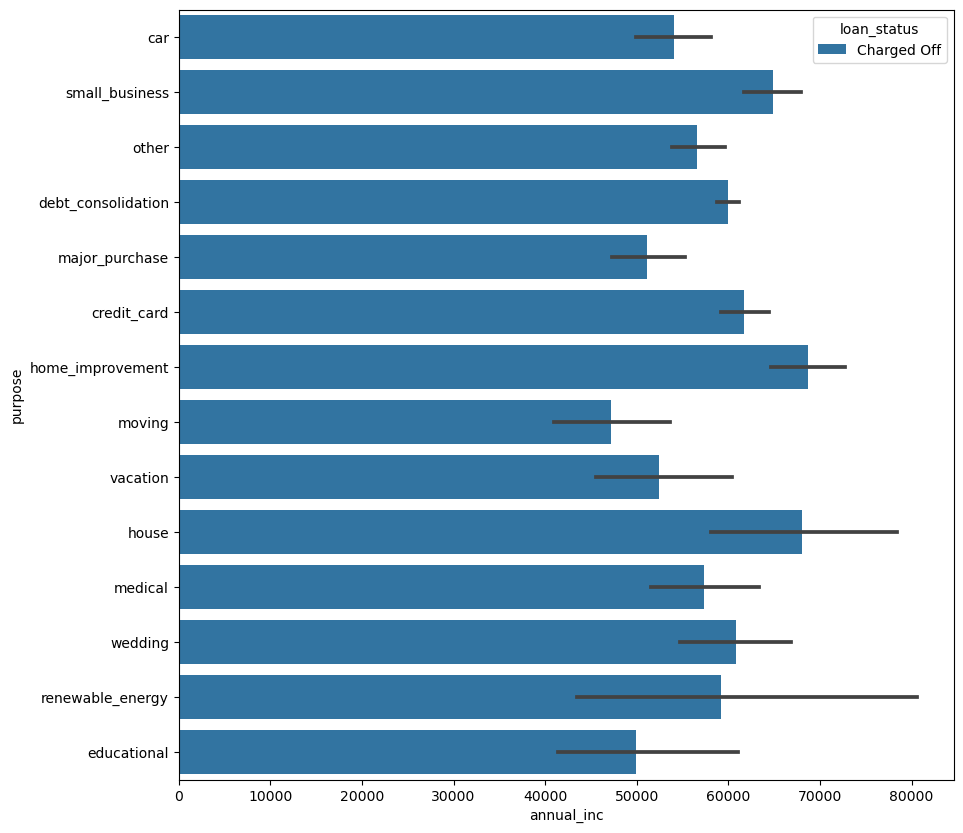

In [255]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off,x='annual_inc', y='purpose', hue ='loan_status')
plt.show()

#### annual_inc X grade

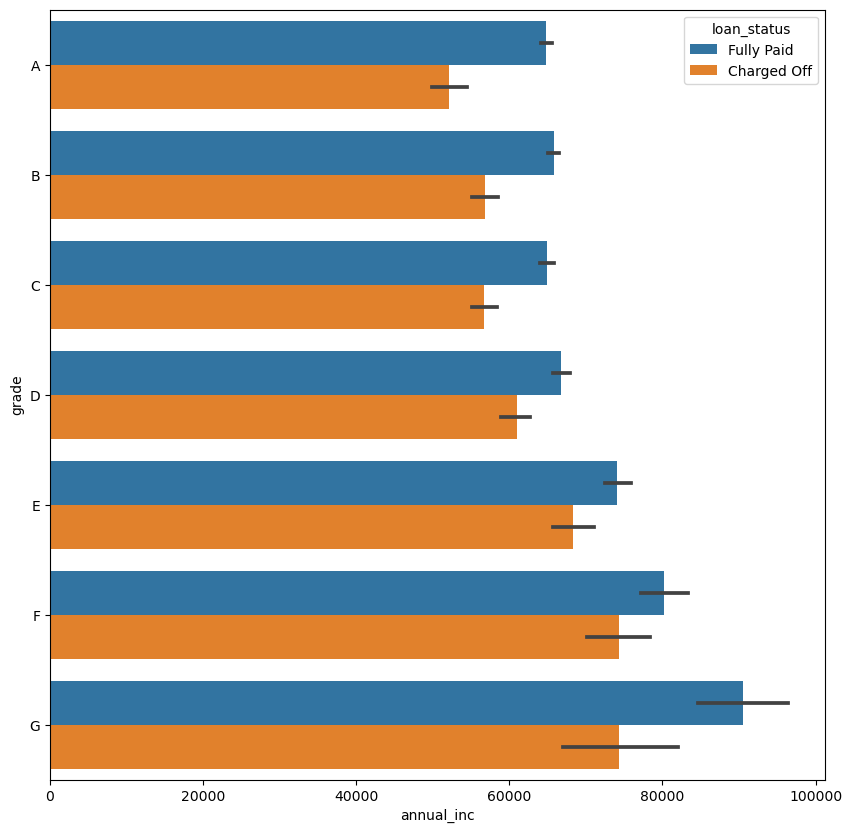

In [256]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3,x='annual_inc', y='grade', hue ='loan_status',order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

#### loan_amnt X grade

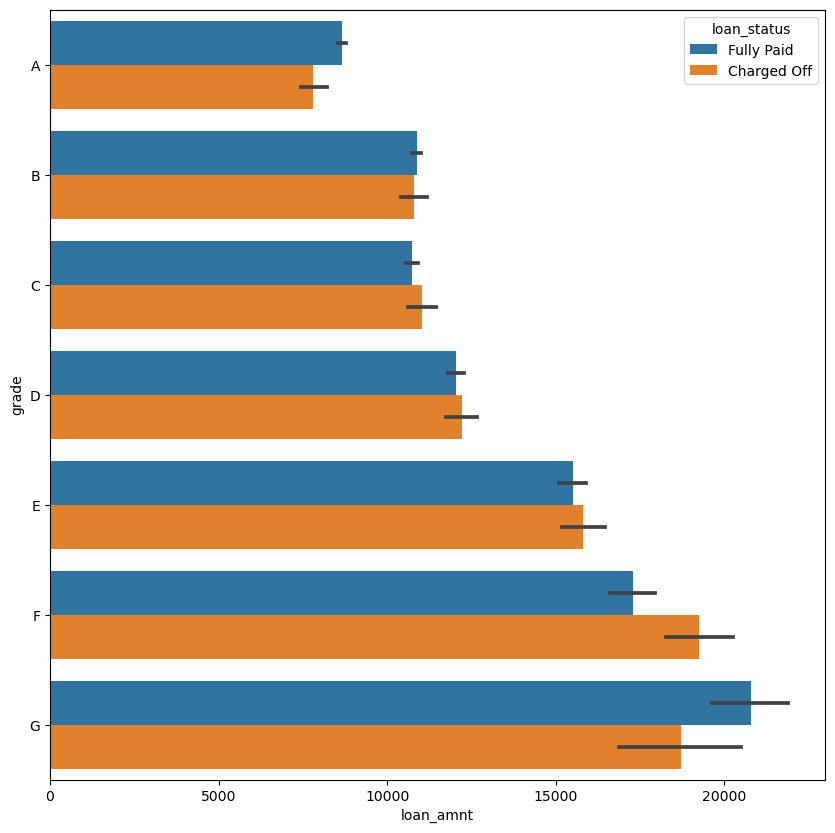

In [257]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3,x='loan_amnt', y='grade', hue ='loan_status', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

#### annual_inc X home_ownership

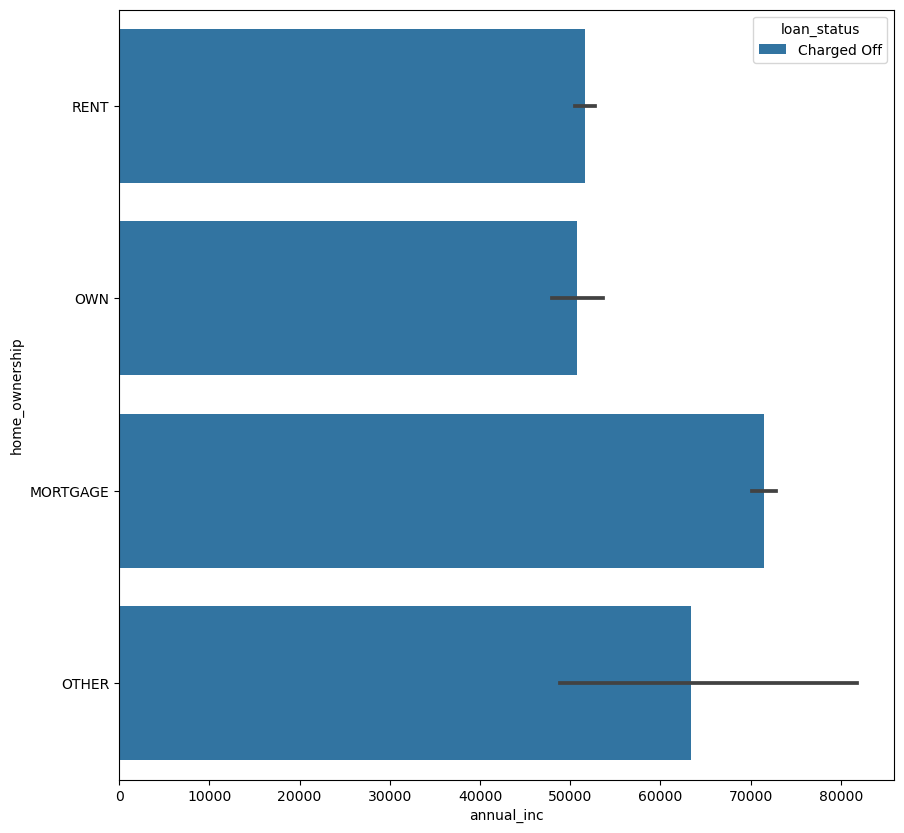

In [258]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off,x='annual_inc', y='home_ownership', hue ='loan_status')
plt.show()

#### annual_inc X revol_util_group

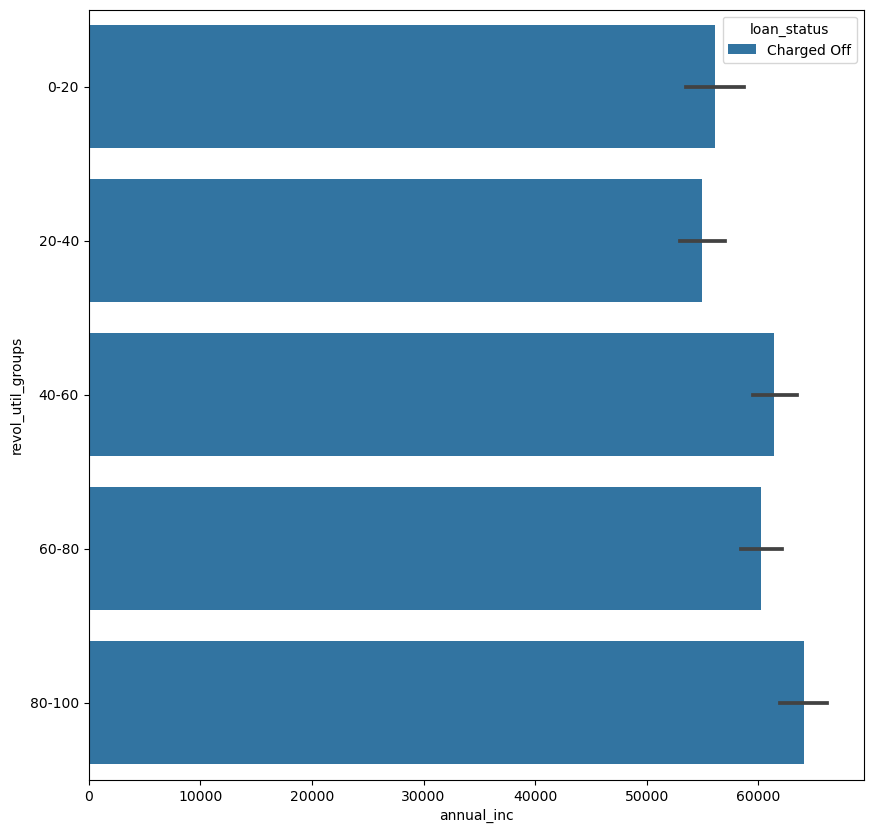

In [259]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off,x='annual_inc', y='revol_util_groups', hue ='loan_status')
plt.show()

#### loan_amnt X purpose

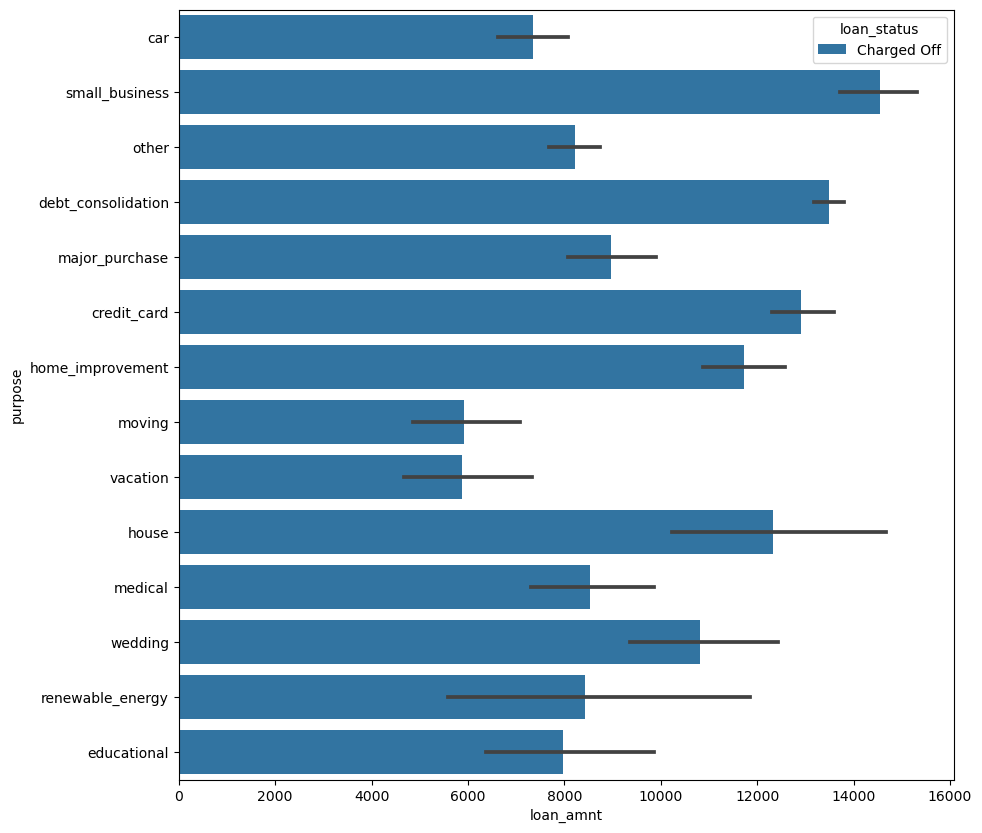

In [260]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off,x='loan_amnt', y='purpose', hue ='loan_status')
plt.show()

#### dti X purpose

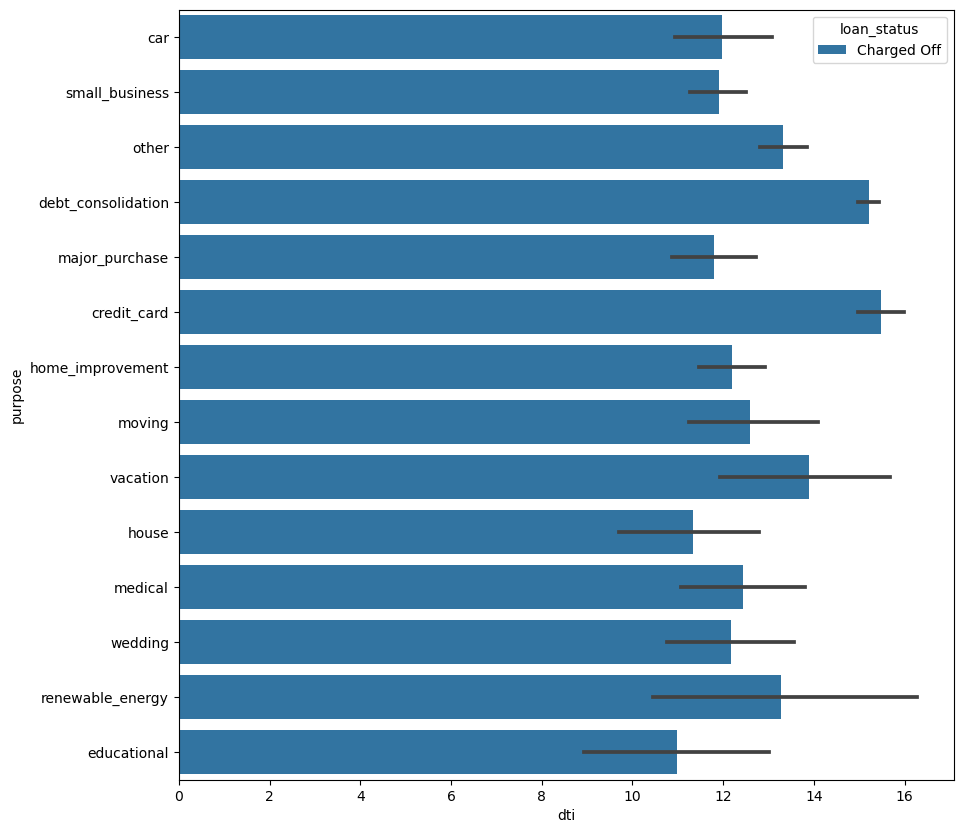

In [261]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off,x='dti', y='purpose', hue ='loan_status')
plt.show()

#### emp_length X purpose

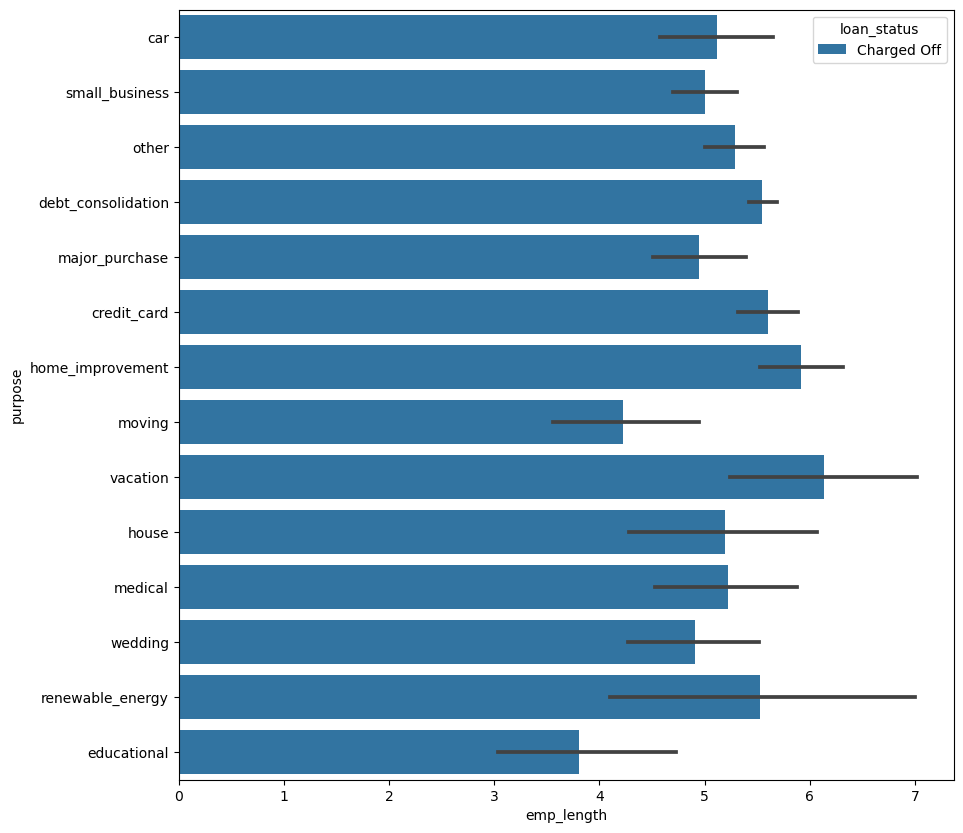

In [262]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off,x='emp_length', y='purpose', hue ='loan_status')
plt.show()

#### open_acc X purpose

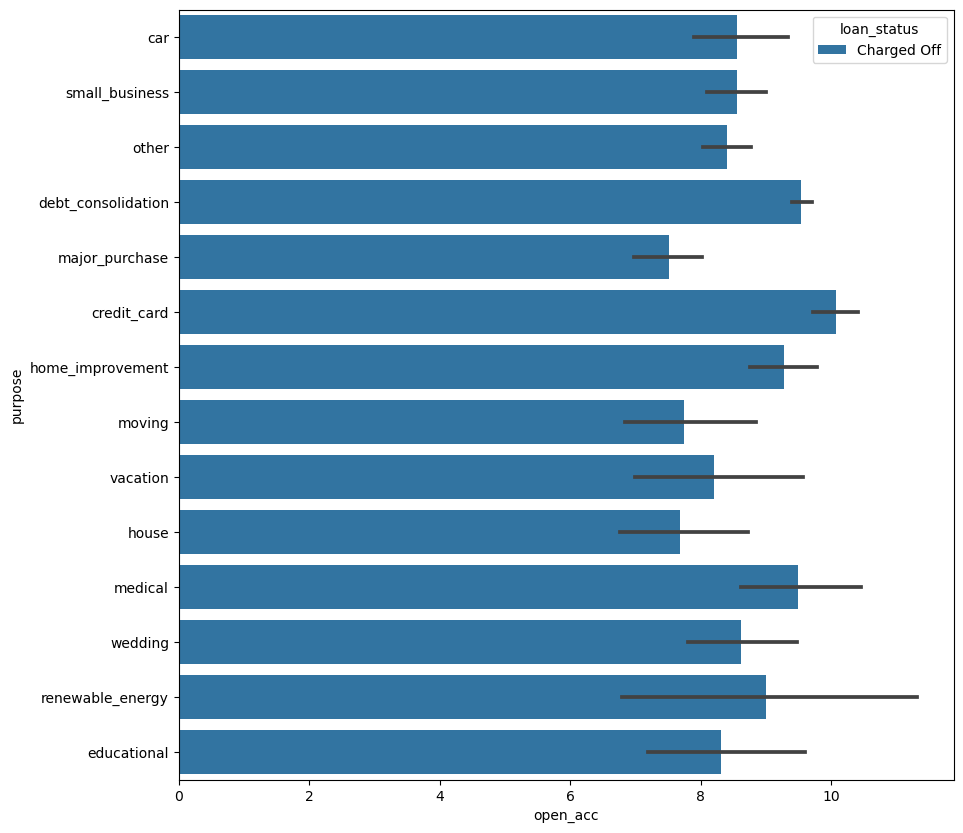

In [263]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off,x='open_acc', y='purpose', hue ='loan_status')
plt.show()

#### open_acc X home_ownership

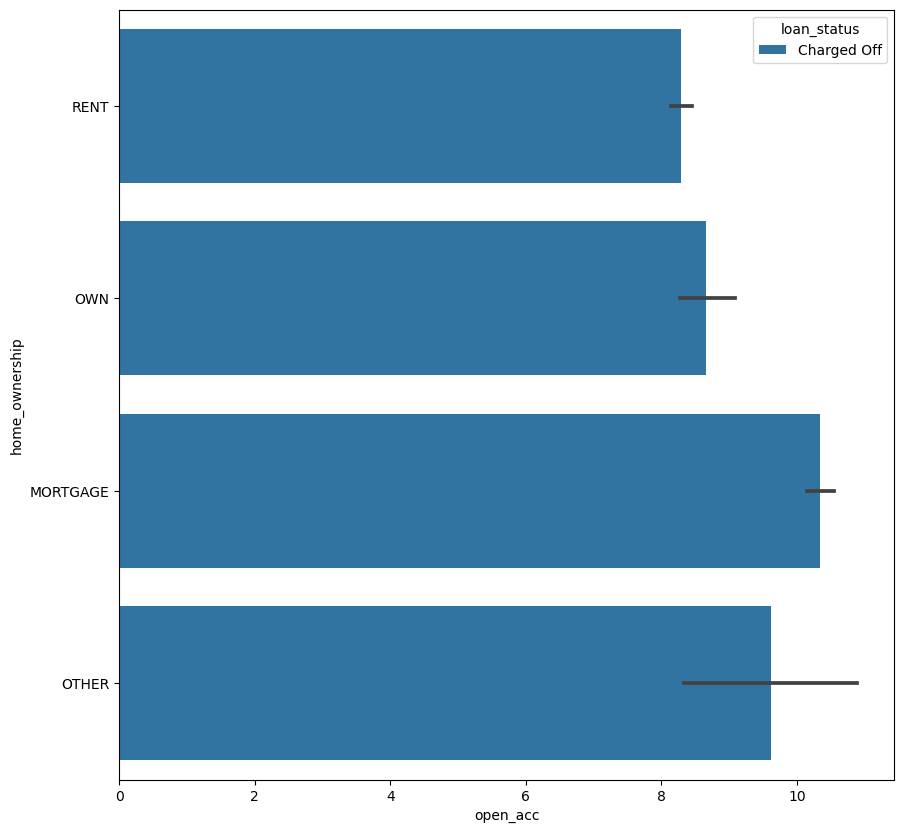

In [264]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off,x='open_acc', y='home_ownership', hue ='loan_status')
plt.show()

#### total_acc X purpose

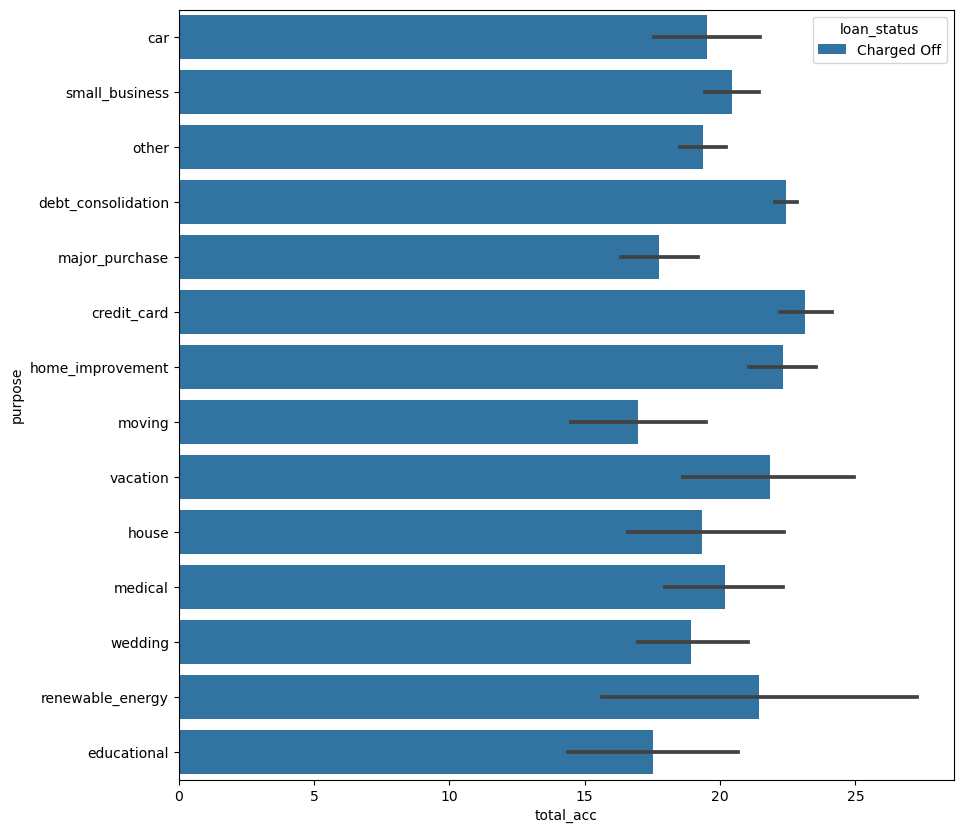

In [265]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off,x='total_acc', y='purpose', hue ='loan_status')
plt.show()

#### loan_amnt X addr_state

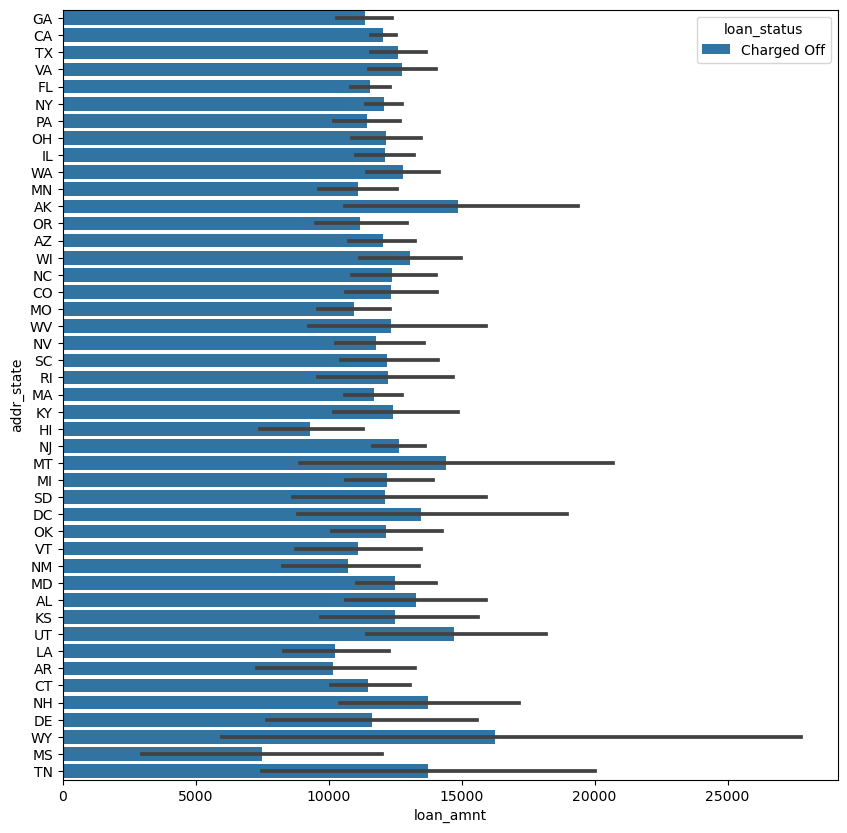

In [266]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off,x='loan_amnt', y='addr_state', hue ='loan_status')
plt.show()

#### annual_inc X addr_state

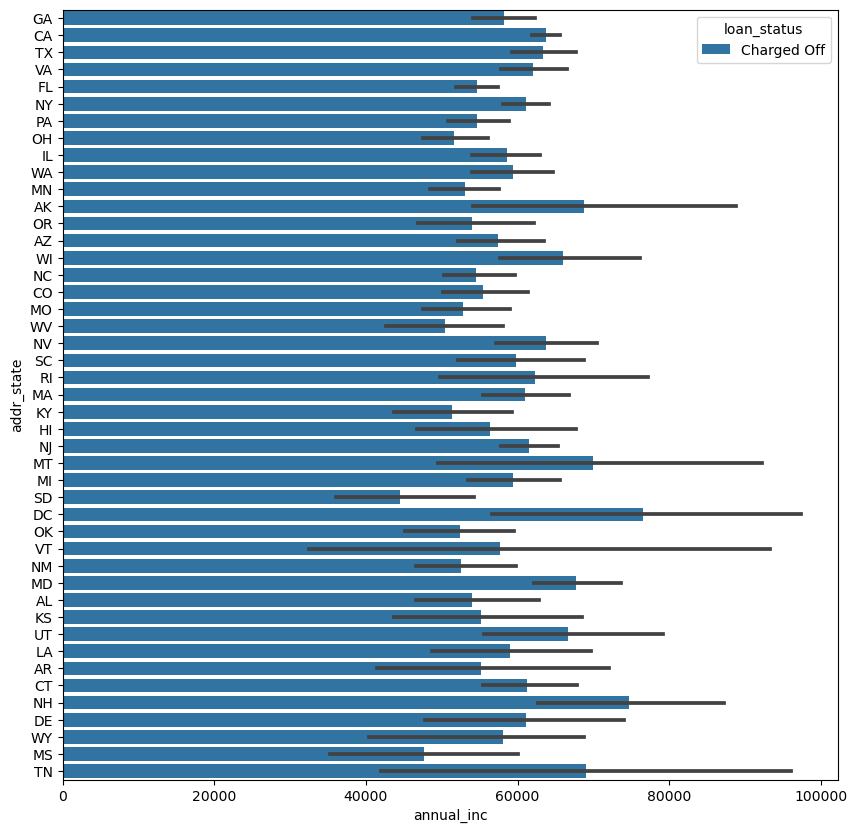

In [267]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off,x='annual_inc', y='addr_state', hue ='loan_status')
plt.show()

#### inq_last_6mths X addr_state

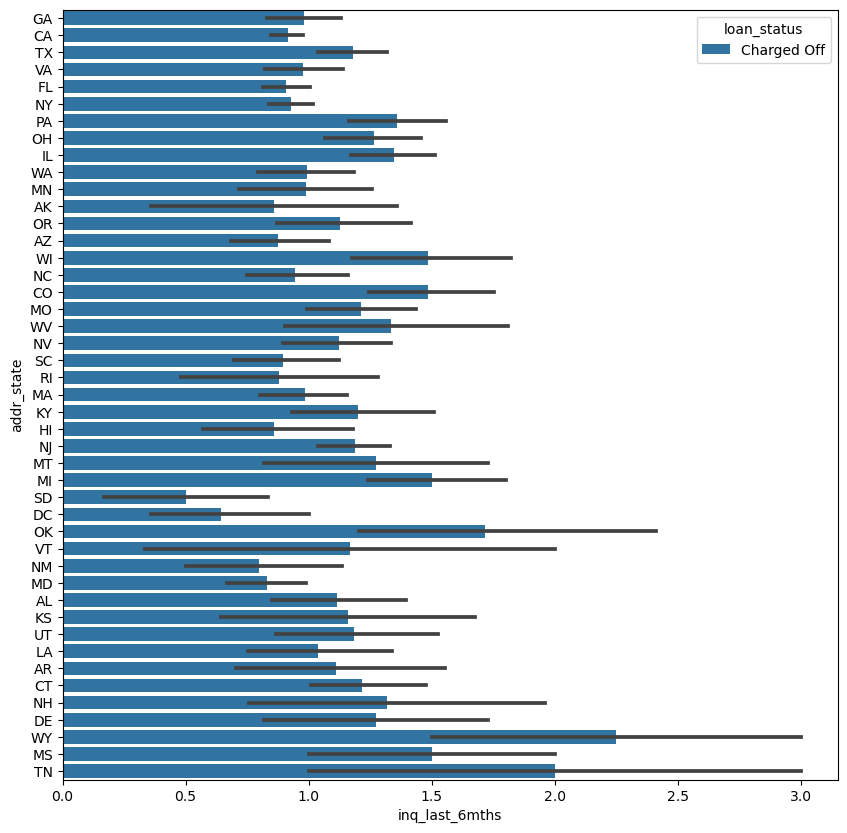

In [268]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off,x='inq_last_6mths', y='addr_state', hue ='loan_status')
plt.show()

#### int_rate X sub_grade

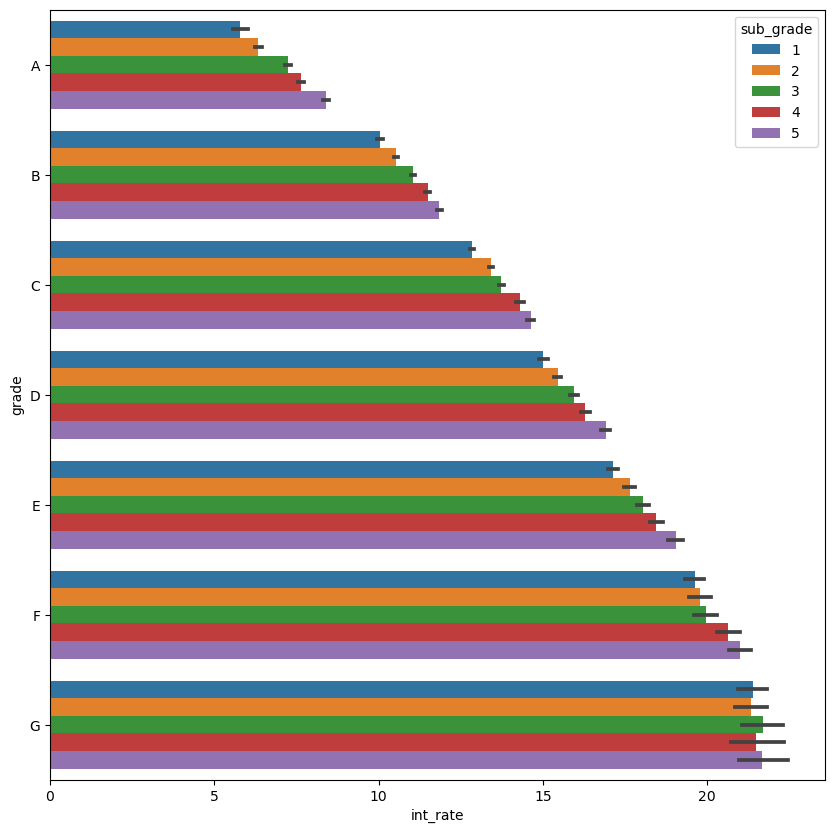

In [271]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off,x='int_rate', y='grade', hue ='sub_grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

#### term X sub_grade

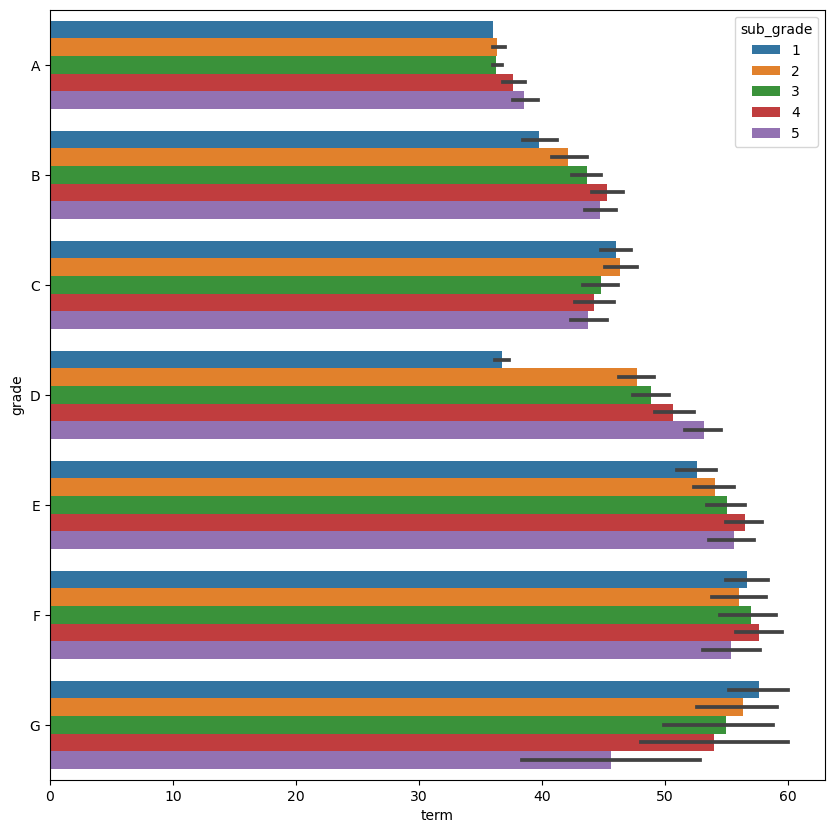

In [288]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_3_charged_off, x='term', y='grade', hue ='sub_grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

### Observations from Bi-variate Analysis

From the bi-variate analysis, we can make the following observations that there is more possibility of defaulting when:
* When the 'annual_inc' is between '60k-70k' purpose is 'home_improvement' or 'house' 
* When the 'annual_inc' is between '60k-70k' and 'grade' is 'F' or 'G'
* When the 'annual_inc' is between '60k-70k' and 'home_ownership' is 'MORTGAGE'
* When the 'annual_inc' is above '60k' and 'revol_util' is between '80-100'
* When the 'purpose' is 'small_business' and 'loan_amnt' is '14k-16k' 
* When the 'purpose' is 'credit_card' and 'dti' is between '14-16' 
* When the 'purpose' is 'vacation' and 'emp_length' is between '6-7 years'
* When the 'purpose' is 'house' and 'inq_last_6mths' is between '1-2' 
* When the 'home_ownership' is 'MOREGAGE' and 'open_acc' is close to '10'
* When the 'loan_amnt' is between '15k-20k' and 'grade' is 'F'
* When the 'addr_state' is 'WY' and 'loan_amnt' is above '15k'
* When the 'addr_state' is 'DC' and 'annual_inc' is between '70-80k'
* When the 'addr_state' is 'WY' and 'inq_last_6mths' is above '2'
